In [3]:
import sys
sys.path.append(r'N:\Planet-A\Current-Users\Enayat-Moallemi\EMAworkbench-master')
#sys.path.append(r'C:\Users\moallemie\GitHub')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ema_workbench import load_results, ema_logging

## Load the targets and prepare input data

In [5]:
# Set the number of experiments you have per each scenario
number_sc = 10000

'''# Set the target year. 130 is 2030; 150 is 2050; 200 is 2100
target_year = [130]'''

# Specify scenarios to analyse
scenarios = ['SSP1-26', 'SSP2-45', 'SSP3-70','SSP4-60','SSP5-85']

# Read the indicators from the Scenario Framework spreadsheet
directory = 'N:/Planet-A/Current-Users/Enayat-Moallemi/Moallemi_et_al_SDG_SSP_Assessment/Model/'

# Read the indicators, their targets, and the historical data from the Scenario Framework spreadsheet
df_hist = pd.read_excel(directory+'ScenarioFramework.xlsx', sheet_name='SDG_indicator_metadata')
df_ind1 = pd.read_excel(directory+'ScenarioFramework.xlsx', sheet_name='SDG_indicator_target')

ind1_vars = df_ind1['Target indicator'].to_list()

# Save the entire list of indicators.
indicator_list = ind1_vars


# Read the targets from Scenario Framework spreadsheet
targets_2030 = {}
targets_2050 = {}
targets_2100 = {}

for i, ind in enumerate(ind1_vars):
    targets_2030[ind] = [df_ind1['Ambitious target 2030'][i], df_ind1['Moderate target 2030'][i], 
                    df_ind1['Weak target 2030'][i], df_ind1['Worst value 2030'][i],  df_ind1['Model reference value'][i], df_ind1['Indicator improvement'][i]]
    targets_2050[ind] = [df_ind1['Ambitious target 2050'][i], df_ind1['Moderate target 2050'][i], 
                    df_ind1['Weak target 2050'][i], df_ind1['Worst value 2050'][i], df_ind1['Model reference value'][i], df_ind1['Indicator improvement'][i]]
    targets_2100[ind] = [df_ind1['Ambitious target 2100'][i], df_ind1['Moderate target 2100'][i], 
                    df_ind1['Weak target 2100'][i], df_ind1['Worst value 2100'][i], df_ind1['Model reference value'][i], df_ind1['Indicator improvement'][i]]

    
# Specify indicators units for y_label later for plotting in form of a dictionary
inds_unit = {**dict(zip(df_ind1['Target indicator'], df_ind1['Unit']))}

# Define SDG and SSP colours with HEX codes
sdg_colors = {'2':'#dda63a','3':'#4c9f38','4':'#c5192d','7':'#fcc30b','8':'#a21942',
              '12':'#bf8b2e','13':'#3f7e44','15':'#56c02b'}

sdg_names = {'2':'SDG2','3':'SDG3','4':'SDG4','7':'SDG7','8':'SDG8',
              '12':'SDG12','13':'SDG13','15':'SDG15'}

ssp_names = {'SSP1-26': 'Green recovery', 'SSP2-45': 'Business as usual', 
             'SSP3-70': 'Fragmented world', 'SSP4-60': 'Inequality', 'SSP5-85': 'Fossil-fueled development'}

sc_colors = {'SSP1-26': '#519872','SSP2-45':'#797a7e','SSP3-70':'#d1478c', 'SSP4-60':'#6a51a3', 'SSP5-85':'#fddb3a', 'Historical':'black'}
#sc_colors = {'SSP1': '#1fab89','SSP2':'#f6cd61','SSP3':'#d1478c', 'SSP4':'#6a51a3', 'SSP5':'#1f4068', 'Historical':'black'}
sc_lines = {'SSP1-26': 'dashed','SSP2-45':'solid','SSP3-70':'dashdot', 'SSP4-60':(0, (3, 5, 1, 5, 1, 5)), 'SSP5-85':'dotted', 'Historical':'black'}

'''decrs_colors = {0:'#fee2b3', 1:'#ffa299', 2:'#e79cc2', 3:'#ad6989', 4:'#562349'}
incrs_colors = {0:'#f4eeff', 1:'#dcd6f7', 2:'#a6b1e1', 3:'#726a95', 4:'#424874'}'''


"decrs_colors = {0:'#fee2b3', 1:'#ffa299', 2:'#e79cc2', 3:'#ad6989', 4:'#562349'}\nincrs_colors = {0:'#f4eeff', 1:'#dcd6f7', 2:'#a6b1e1', 3:'#726a95', 4:'#424874'}"

## Load the experiments

In [7]:
directory = 'N:/Planet-A/Current-Users/Enayat-Moallemi/Moallemi_et_al_SDG_SSP_Assessment/Results/Exploration_results/'

results = {}
experiments = {}
outcomes = {}
for s, scenario in enumerate(scenarios):
    results[scenario] = load_results(directory+'SDG_{}_exploration_sc{}.tar.gz'.format(scenario, number_sc))
    experiments[scenario], outcomes[scenario] = results[scenario]

In [8]:
# Flatten 2D arrays in outcomes[indicator] to 1D array and create a long-format dataframe for plotting the uncertainty
# Why we convert outcomes to long-format dataframe? because it's the accepted format of sns.lineplot which draws uncertainty
outcomes_dict = {}

for i in scenarios:
    outcomes_df = pd.DataFrame(columns=(['TIME']+indicator_list))
    for key in (['TIME']+indicator_list): 
        outcomes_df[key] = outcomes[i][key][:, 100:].ravel() # Plot timeseries data from 2000 (100:)
    outcomes_dict[i] = outcomes_df 

In [9]:
outcomes_dict['SSP1-26']

TIME  Cereal Yield  Vegetal Food supply  Animal Food supply  \
0        2000.0      3.786752            2446.4658           407.80444   
1        2001.0      3.844686            2459.1162           409.44788   
2        2002.0      3.904297            2471.6567           411.05304   
3        2003.0      3.963004            2484.1047           412.65723   
4        2004.0      4.020736            2496.6382           414.28046   
...         ...           ...                  ...                 ...   
1009995  2096.0     11.163040            3430.5280           224.00882   
1009996  2097.0     11.220546            3432.7983           222.82352   
1009997  2098.0     11.277934            3434.9133           221.61954   
1009998  2099.0     11.335197            3436.9614           220.39217   
1009999  2100.0     11.392317            3439.0842           219.14613   

         Total Food Supply  Ratio of Agricultural Lands to Total Lands  \
0                2854.2703                                    0.536503   
1                2868.5642                                    0.536515   
2                2882.7097                                    0.536572   
3                2896.7620                                    0.536675   
4                2910.9187                                    0.536824   
...                    ...                                         ...   
1009995          3654.5369                                    0.470646   
1009996          3655.6220                                    0.469663   
1009997          3656.5330                                    0.468666   
1009998          3657.3535                                    0.467656   
1009999          3658.2302                                    0.466631   

         Pasture Land Indicator  Total Croplands Indicator  Life Expectancy  \
0                     3238.0564                  1583.7809        67.514725   
1                     3237.9517                  1583.7295        67.699230   
2                     3238.1245                  1583.8142        67.877340   
3                     3238.5745                  1584.0343        68.049440   
4                     3239.3020                  1584.3901        68.216515   
...                         ...                        ...              ...   
1009995               2825.3916                  1381.9404        77.155110   
1009996               2819.3372                  1378.9791        77.177150   
1009997               2813.1980                  1375.9763        77.198395   
1009998               2806.9746                  1372.9325        77.219215   
1009999               2800.6700                  1369.8488        77.240250   

         Human Development Index  ...  Atmospheric Concentration CO2  \
0                       0.639560  ...                      376.26016   
1                       0.643716  ...                      378.71670   
2                       0.647866  ...                      381.22710   
3                       0.652010  ...                      383.79230   
4                       0.656150  ...                      386.41290   
...                          ...  ...                            ...   
1009995                 0.962236  ...                      448.00950   
1009996                 0.963831  ...                      447.11926   
1009997                 0.965409  ...                      446.22693   
1009998                 0.966974  ...                      445.33243   
1009999                 0.968528  ...                      444.43573   

         Total CO2 Emissions from AFOLU  CO2 Emissions from Fossil Energy  \
0                              9.762020                         25.236845   
1                              9.859087                         25.850708   
2                              9.956969                         26.468868   
3                             10.055800                         27.091015   
4                             10.1

## Target ambition and feasibility test (maintext)

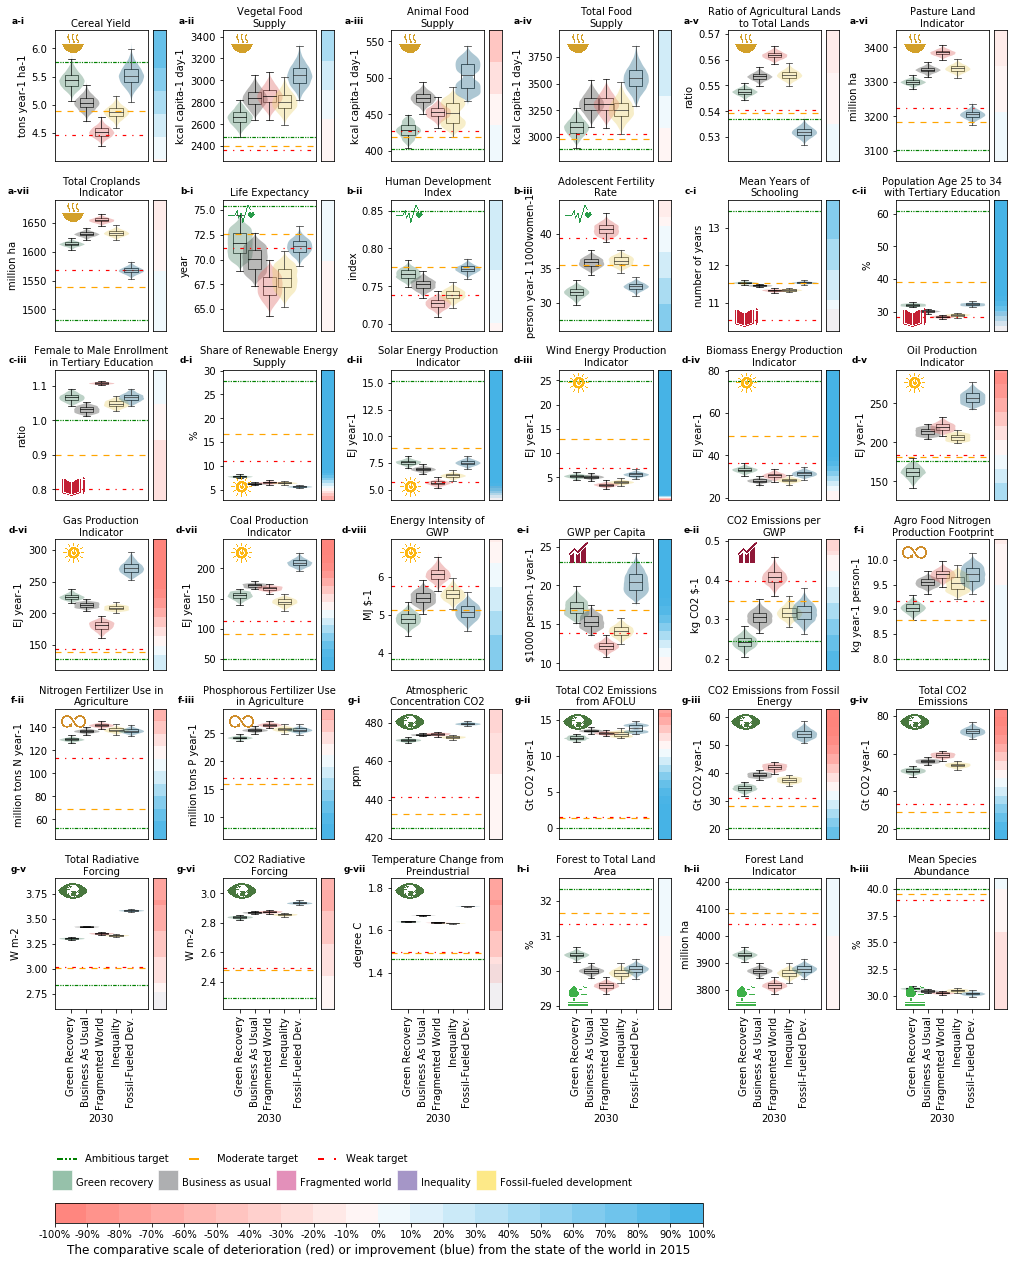

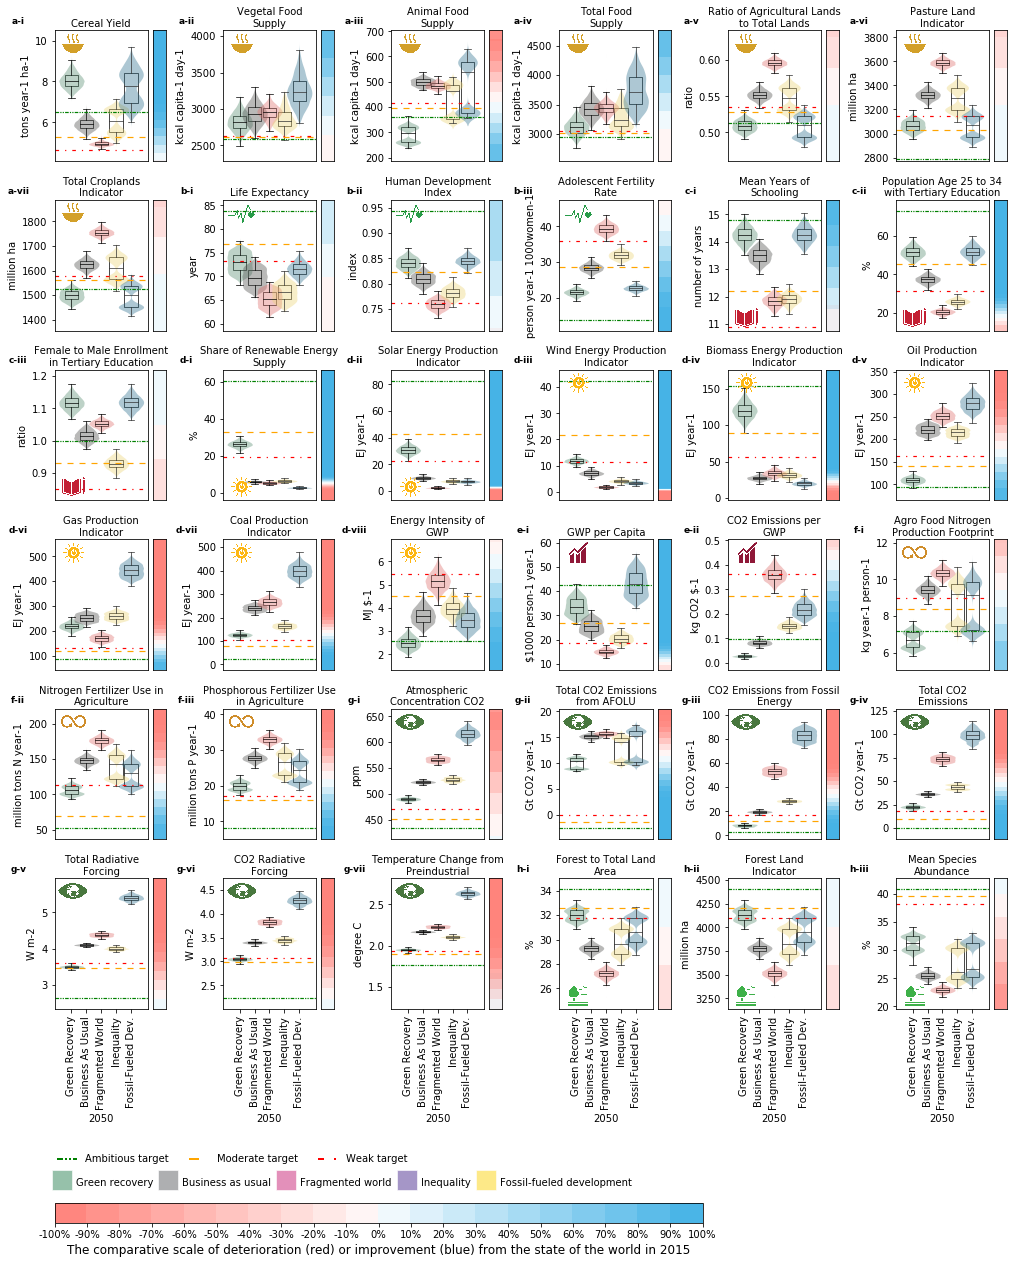

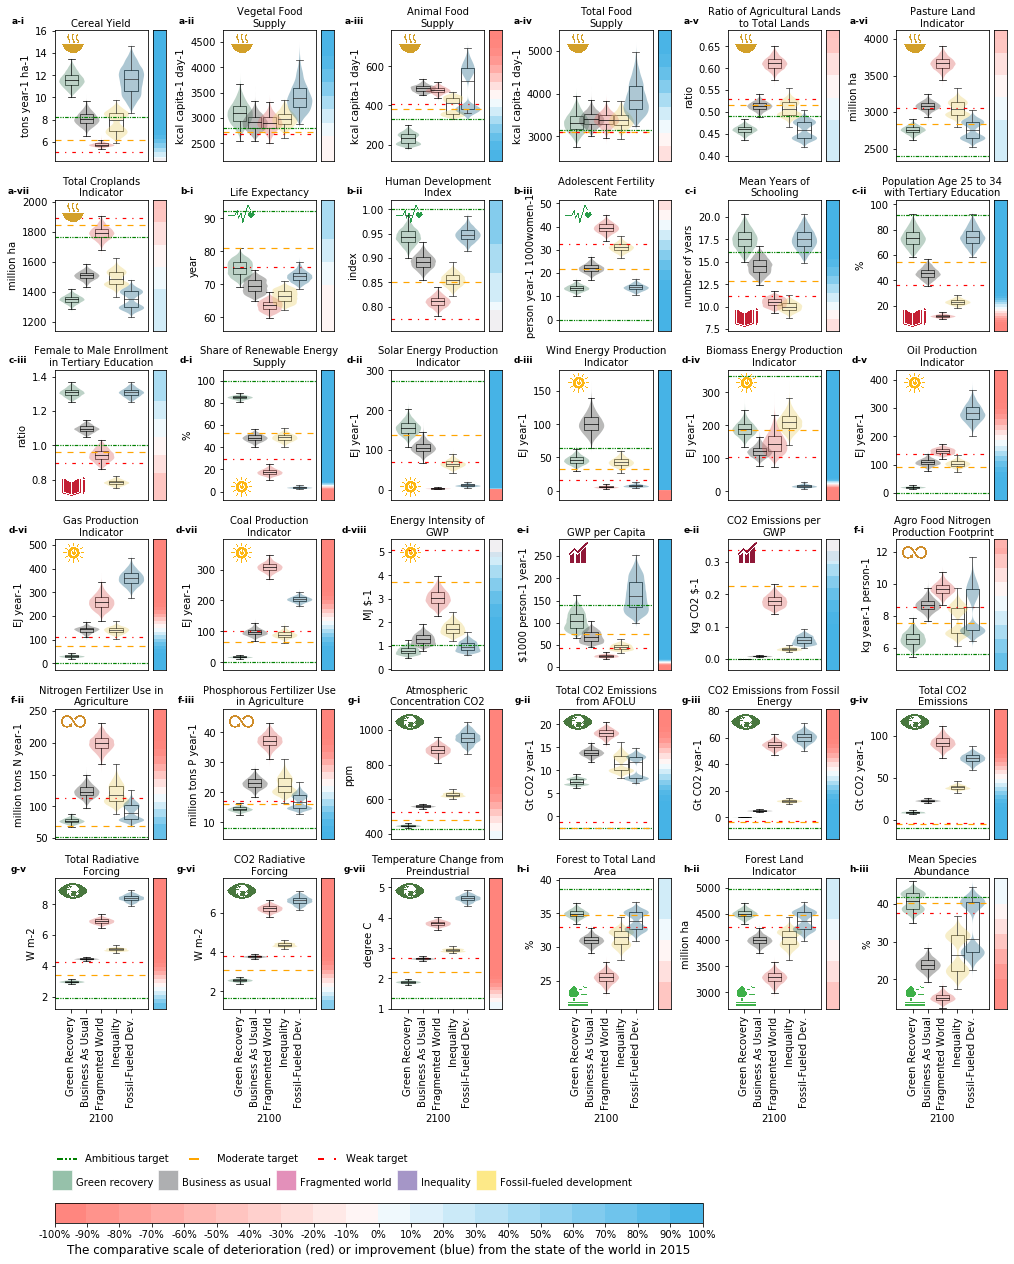

In [10]:
from textwrap import wrap
import math
from adjustText import adjust_text
from matplotlib.lines import Line2D
import matplotlib as mpl
import matplotlib.ticker as mticker
import string
import matplotlib.image as mpimg
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox


target_yr_val = {2030: targets_2030, 2050: targets_2050, 2100: targets_2100}

for yr in [2030, 2050, 2100]:
    # Flatten 2D arrays in outcomes[indicator] to 1D array and create a long-format dataframe for plotting the uncertainty
    # Why we convert outcomes to long-format dataframe? because it's the accepted format of sns.lineplot which draws uncertainty
    outcomes_dict_list = []


    for s, sc in enumerate(scenarios):
        outcomes_dict_temp = outcomes_dict[sc]
        outcomes_dict_temp['Pathway'] = ssp_names[sc]
        outcomes_dict_list.append(outcomes_dict_temp)

    outcomes_dict_2 = pd.concat(outcomes_dict_list)
    outcomes_dict_2_f = outcomes_dict_2[(outcomes_dict_2['TIME']==yr)]


    # Temporary indicator list to be used in plotting here. It's the same to the list of all indicators minus share of fossil energy
    inds_remove = ['Share of Fossil Energy Supply']
    inds_list = [x for x in indicator_list if x not in inds_remove]

    line_style = [((3, 1, 1, 1, 1, 1), 'green'), ((5, 5), 'orange'), ((3, 5, 1, 5), 'red')]


    # Create grids and axes
    fig = plt.figure(figsize=(18, 18))

    # The plots will be in n column and am number of rows, depending on the number of indicators
    fig_rows = 6
    fig_cols = 6

    # Set the width ratio of subplots (main plot, colorbar, and gap between horizontal plots)
    width_ratios = [5, .7, 2.5]*fig_cols
    grid = plt.GridSpec(fig_rows, fig_cols*3, hspace=0.3, wspace=0.1, width_ratios=width_ratios)

    axes = {}

    # Create the reference axes for subplots and their color gradient.
    for j in range(fig_cols):
        axes[5,j*3] = fig.add_subplot(grid[5, j*3])
        axes[5,j*3+1] = fig.add_subplot(grid[5, j*3+1], sharey=axes[5,j*3])

    # Create othersubplots and their color gradient with shared axis with the reference plots.
    for i in range(fig_rows-1):
        for j in range (fig_cols):
            axes[i,j*3] = fig.add_subplot(grid[i, j*3], sharex=axes[5,j*3])
            axes[i,j*3+1] = fig.add_subplot(grid[i, j*3+1], sharex=axes[5,j*3+1])


    # For iterating betweeing subplots
    i = 0
    j = 0

    # For iterating between SDG icons
    sdg_ind_no = [7,10,13,21,23,26,33,36] # Cumulative number of indicators per SDGs
    sdg_n = [2, 3, 4, 7, 8, 12, 13, 15]
    s = 0

    # For iterating between  subplot labels
    fig_sdg = list(string.ascii_lowercase)
    fig_ind = ['-i', '-ii', '-iii', '-iv', '-v', '-vi', '-vii', '-viii', '-ix', '-x']
    ind = 0

    for v, var in enumerate(inds_list): #inds_list
        if j == fig_cols:
            j = 0
            i += 1

        sns.violinplot(x="Pathway", y=var,data=outcomes_dict_2_f, 
                       palette=['#519872','#50514f','#f25f5c', '#ffe066', '#247ba0'], 
                       linewidth=0, ax=axes[i,j*3], scale='width', width=1.7)
        for violin, alpha in zip(axes[i,j*3].collections[::2], [.4, .4, .4, .4, .4]):
            violin.set_alpha(alpha)

        sns.boxplot(x="Pathway", y=var,data=outcomes_dict_2_f,  width=0.9, linewidth=.7, ax=axes[i,j*3],
            palette=['#519872','#50514f','#f25f5c', '#ffe066', '#247ba0'], showfliers=False)

        for a,artist in enumerate(axes[i,j*3].artists):
            # Set the linecolor on the artist to the facecolor, and set the facecolor to None
            col = artist.get_facecolor()
            artist.set_edgecolor('black')
            artist.set_facecolor('None')

            # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
            # Loop over them here, and use the same colour as above
            for b in range(a*5,a*5+5):
                line = axes[i,j*3].lines[b]
                line.set_color('black')
                line.set_mfc('black')
                line.set_mec('black')


        # Set title and y-axis unit
        x_labels = ['Green Recovery','Business As Usual','Fragmented World','Inequality','Fossil-Fueled Dev.']
        if len(var) < 20:
            nwrap = 15
        if (len(var) < 30) and (len(var) > 20):
            nwrap=20
        if len(var) > 30:
            nwrap = 27
        # Temprary code to correct two subplot title. This should be removed once it's corrected in the model var name in Vensim
        if var in ['Vegetal Food supply']:
            axes[i,j*3].set_title('\n'.join(wrap('Vegetal Food Supply', nwrap)), fontsize=10, pad=4)
        elif var in ['Animal Food supply']:
            axes[i,j*3].set_title('\n'.join(wrap('Animal Food Supply', nwrap)), fontsize=10, pad=4) 
        else:
            axes[i,j*3].set_title('\n'.join(wrap(var, nwrap)), fontsize=10, pad=4)
        axes[i,j*3].yaxis.set_label_text('\n'.join(wrap(inds_unit[var], 25)), fontsize=10)
        axes[i,j*3].set_xticklabels(x_labels, fontsize=10, rotation=90)
        #axes[i, j*3].tick_params(axis='x', rotation=90) 
        axes[i, j*3].set_xlabel(str(yr))
        #axes[i,j].get_legend().remove()

        # Adjust the plot margins
        axes[i,j*3].margins(x=.05)
        axes[i,j*3].margins(y=.1)
        axes[i,j*3+1].margins(y=0)


        # Annotate the target levels
        x_val = []
        y_val = []

        for y in range(3):
            targets_value = [target_yr_val[yr][var][y]]
            targets_year = [0]

            # For indicators where reduction in indicator value is desired
            if targets_2030[var][5] == 'lower is better':
                axes[i,j*3].axhline(y=targets_value, xmin=0, xmax=1, dashes=line_style[y][0],  alpha=1, lw=1.2, c=line_style[y][1])
                #axes[i,j].plot(targets_year, targets_value, linestyle="None", marker='v', alpha=1, markersize=4 ,color='black')
            # For indicators where increase in value is desired
            if targets_2030[var][5] == 'higher is better':
                axes[i,j*3].axhline(y=targets_value, xmin=0, xmax=1, dashes=line_style[y][0], alpha=1, lw=1.2, c=line_style[y][1])

            x_val = x_val + targets_year
            y_val = y_val + targets_value

        #text = ['A', 'M', 'W']        
        #texts = []
        #for x, y, s in zip(x_val, y_val, text):
            #texts.append(axes[i,j*3+1].text(x, y, s))


        # Print the SDG icon and add subplot labels
        img_dir = 'N:/Planet-A/Current-Users/Enayat-Moallemi/Moallemi_et_al_SDG_SSP_Assessment/Fig/SDG_icons/'

        if v > sdg_ind_no[s]-1:
            s = s+1
            ind = 0

        img = mpimg.imread(img_dir+str(sdg_n[s])+'.png')
        imagebox = OffsetImage(img, zoom=0.013)
        if v in [10,11,12,13, 14, 33, 34,35,36]: # Move the SDG icons to the bottom left for certain indicators 
            ab = AnnotationBbox(imagebox, (.2, .1), xycoords='axes fraction', frameon=False)
        else:
            ab = AnnotationBbox(imagebox, (.2, .9), xycoords='axes fraction', frameon=False) 
        axes[i,j*3].add_artist(ab)

        # Add subplot label text
        axes[i,j*3].text(-.39, 1.07, fig_sdg[s]+fig_ind[ind], fontsize=9, fontweight='semibold', rotation=0,
                         horizontalalignment='center', verticalalignment='center', transform=axes[i,j*3].transAxes)

        ind += 1 # Iterate between subplot lables under each SDG


        j += 1


    # Draw the shaded increment boxes in the background of each subplot
    i = 0
    j = 0
    for v, var in enumerate(inds_list): 

        if j == fig_cols:
            j = 0
            i += 1

        # Create 10% improvement (increase or decrease) increment from the model reference value.
        improv_incr = targets_2030[var][4]*.1

        # Get the min and max of each subplot
        y_min = axes[i,j*3].get_ylim()[0]
        y_max = axes[i,j*3].get_ylim()[1]

        # For indicators where reduction in indicator value is desired
        if targets_2030[var][5] == 'lower is better':

            # Color the increment steps up to 10 steps with blue
            for c in range(10):
                if (targets_2030[var][4]-improv_incr*(c+1)) > y_min:
                    axes[i,j*3+1].axhspan(targets_2030[var][4]-improv_incr*(c+1), targets_2030[var][4]-improv_incr*(c), 
                                      facecolor='#46b3e6', alpha=0.08+(0.1*c), zorder=-100)
                    axes[i,j*3+1].axhspan(y_min, targets_2030[var][4]-improv_incr*(c+1), facecolor='#46b3e6', 
                                      alpha=0.08+(0.1*c), zorder=-100)
                else:
                    if c == 0:
                        axes[i,j*3+1].axhspan(y_min, targets_2030[var][4]-improv_incr*(c), facecolor='#46b3e6', 
                                          alpha=0.08+(0.1*c), zorder=-100)
            # Color the increment steps up to 10 steps with red
            for c in range(10):
                if (targets_2030[var][4]+improv_incr*c) < y_max:
                    axes[i,j*3+1].axhspan(targets_2030[var][4]+improv_incr*c, targets_2030[var][4]+improv_incr*(c+1), 
                                      facecolor='#ff847c', alpha=0.08+(0.1*c), zorder=-100)
                    axes[i,j*3+1].axhspan(targets_2030[var][4]+improv_incr*(c+1), y_max, facecolor='#ff847c', 
                                      alpha=0.08+(0.1*c), zorder=-100)
                else:
                    if c == 0:  
                        axes[i,j*3+1].axhspan(targets_2030[var][4]+improv_incr*(c), y_max, facecolor='#ff847c', 
                                          alpha=0.08+(0.1*c), zorder=-100)

        # For indicators where increase in value is desired
        if targets_2030[var][5] == 'higher is better':  

            # Color the increment steps up to 10 steps with blue
            for c in range(10):
                if (targets_2030[var][4]+improv_incr*(c+1)) < y_max:
                    axes[i,j*3+1].axhspan(targets_2030[var][4]+improv_incr*c, targets_2030[var][4]+improv_incr*(c+1), 
                                      facecolor='#46b3e6', alpha=0.08+(0.1*c), zorder=-100)
                    axes[i,j*3+1].axhspan(targets_2030[var][4]+improv_incr*(c+1), y_max, facecolor='#46b3e6', 
                                      alpha=0.08+(0.1*c), zorder=-100)
                else:
                    if c == 0:
                        axes[i,j*3+1].axhspan(targets_2030[var][4]+improv_incr*(c), y_max, facecolor='#46b3e6', 
                                          alpha=0.08+(0.1*c), zorder=-100)

            # Color the increment steps up to 10 steps with red
            for c in range(10):
                if (targets_2030[var][4]-improv_incr*(c+1)) > y_min:
                    axes[i,j*3+1].axhspan(targets_2030[var][4]-improv_incr*(c+1), targets_2030[var][4]-improv_incr*c, 
                                      facecolor='#ff847c', alpha=0.08+(0.1*c), zorder=-100)
                    axes[i,j*3+1].axhspan(y_min, targets_2030[var][4]-improv_incr*(c+1), facecolor='#ff847c', 
                                      alpha=0.08+(0.1*c), zorder=-100)
                else:
                    if c == 0:
                        axes[i,j*3+1].axhspan(y_min, targets_2030[var][4]-improv_incr*(c), facecolor='#ff847c', 
                                          alpha=0.08+(0.1*c), zorder=-100)


        # Remove tik=cks and tick labels
        axes[i, j*3+1].yaxis.set_visible(False)
        axes[i, j*3+1].xaxis.set_visible(False)

        j += 1 

    # Removing ticks for inner plots                
    for i in range(fig_rows-1):
        for j in range(fig_cols):
            #axes[i, j].tick_params(bottom=False)
            axes[i, j*3].xaxis.set_visible(False)

    # Add the x-axis elements to the subplots of the second last row       
    '''for j in [2, 3, 4, 5, 6]:
        axes[5,j*3].axis('off')
        axes[5,j*3+1].axis('off')
        axes[4, j*3].xaxis.set_visible(True)
        axes[4, j*3].set_xlabel('2100')
        axes[4, j*3].tick_params(bottom=True, labelbottom=True)'''

    # Create legend for the SSPs
    legend_elements_2 = []


    for i in scenarios:
        legend_elements_2.append(Line2D([0], [0], marker="s", color='none', label=ssp_names[i], 
                                      markersize=20, markeredgecolor='white', markerfacecolor=sc_colors[i], alpha=.6))

    fig.legend(handles=legend_elements_2, loc='upper left', bbox_to_anchor=(.12, -.045, .4, .05), frameon=False, 
               bbox_transform=fig.transFigure, ncol=20, 
               handlelength=1, columnspacing=1, handletextpad=.9, labelspacing=.01, fontsize=10, handleheight=2.4)

    # Create the colorbar for background gradients
    # First, create a list of our values for colorbar
    vals = list(range(-100, 101, 10))
    vals = [x/100 for x in vals]
    vals_text = ["{0:.0%}".format(x) for x in vals]

    # Second, create the colour names with a function
    def alpha_blending(hex_color, alpha) :
        """ alpha blending as if on the white background.
        """
        foreground_tuple  = mpl.colors.hex2color(hex_color)
        foreground_arr = np.array(foreground_tuple)
        final = tuple( (1. -  alpha) + foreground_arr*alpha )
        return(final)

    colorbar_list = []
    for i in range(10):
        colorbar_list.append(alpha_blending('#ff847c', 0.08+(0.1*i)))
    colorbar_list = colorbar_list[::-1]
    for i in range(10):
        colorbar_list.append(alpha_blending('#46b3e6', 0.08+(0.1*i)))


    # Third, create a ListedColormap object, which contains the information of the colours we want to display in our colourbar
    cmap = mpl.colors.ListedColormap(colorbar_list)

    # Fourth, set the colormap index for discrete color bar
    norm = mpl.colors.BoundaryNorm(vals, cmap.N)

    # Fifth, create the colorbar
    ax2 = fig.add_axes([0.95, 0.1, 0.03, 0.7])

    cb = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,
                                    norm=norm,
                                    spacing='uniform',
                                    orientation='horizontal',
                                    extend='neither',
                                    ticks=vals)
    cb.set_ticklabels(vals_text)


    cb.set_label('The comparative scale of deterioration (red) or improvement (blue) from the state of the world in 2015', fontsize=12)
    ax2.set_position((0.125, -.04, 0.5, 0.015)) #0.315, .04, 0.5, 0.015

    legend_elements = [Line2D([0], [0], color=line_style[0][1], lw=2, dashes=line_style[0][0], label='Ambitious target'), 
                       Line2D([0], [0], color=line_style[1][1], lw=2, dashes=line_style[1][0],  label='Moderate target'),
                       Line2D([0], [0], color=line_style[2][1], lw=2, dashes=line_style[2][0], label='Weak target')]


    fig.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(.12, .02),  bbox_transform=fig.transFigure, frameon=False, 
               ncol=3)

    plt.savefig('{}/SSPs_SDGs_target_{}_maintext_300dpi.png'.format(r'C:/Users/moallemie/GitHub/SSPs_SDGs_Assessment/Fig/', yr), dpi=300,  bbox_inches='tight') 
    plt.savefig('{}/SSPs_SDGs_target_{}_maintext.png'.format(r'C:/Users/moallemie/GitHub/SSPs_SDGs_Assessment/Fig/', yr), dpi=600,  bbox_inches='tight') 
    plt.savefig('{}/SSPs_SDGs_target_{}_maintext.pdf'.format(r'C:/Users/moallemie/GitHub/SSPs_SDGs_Assessment/Fig/', yr), dpi=600,  bbox_inches='tight') 


## Progress per indicator (main text)

D:\moallemie\Anaconda\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
D:\moallemie\Anaconda\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
D:\moallemie\Anaconda\lib\site-packages\ipykernel_launcher.py:124: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future ve

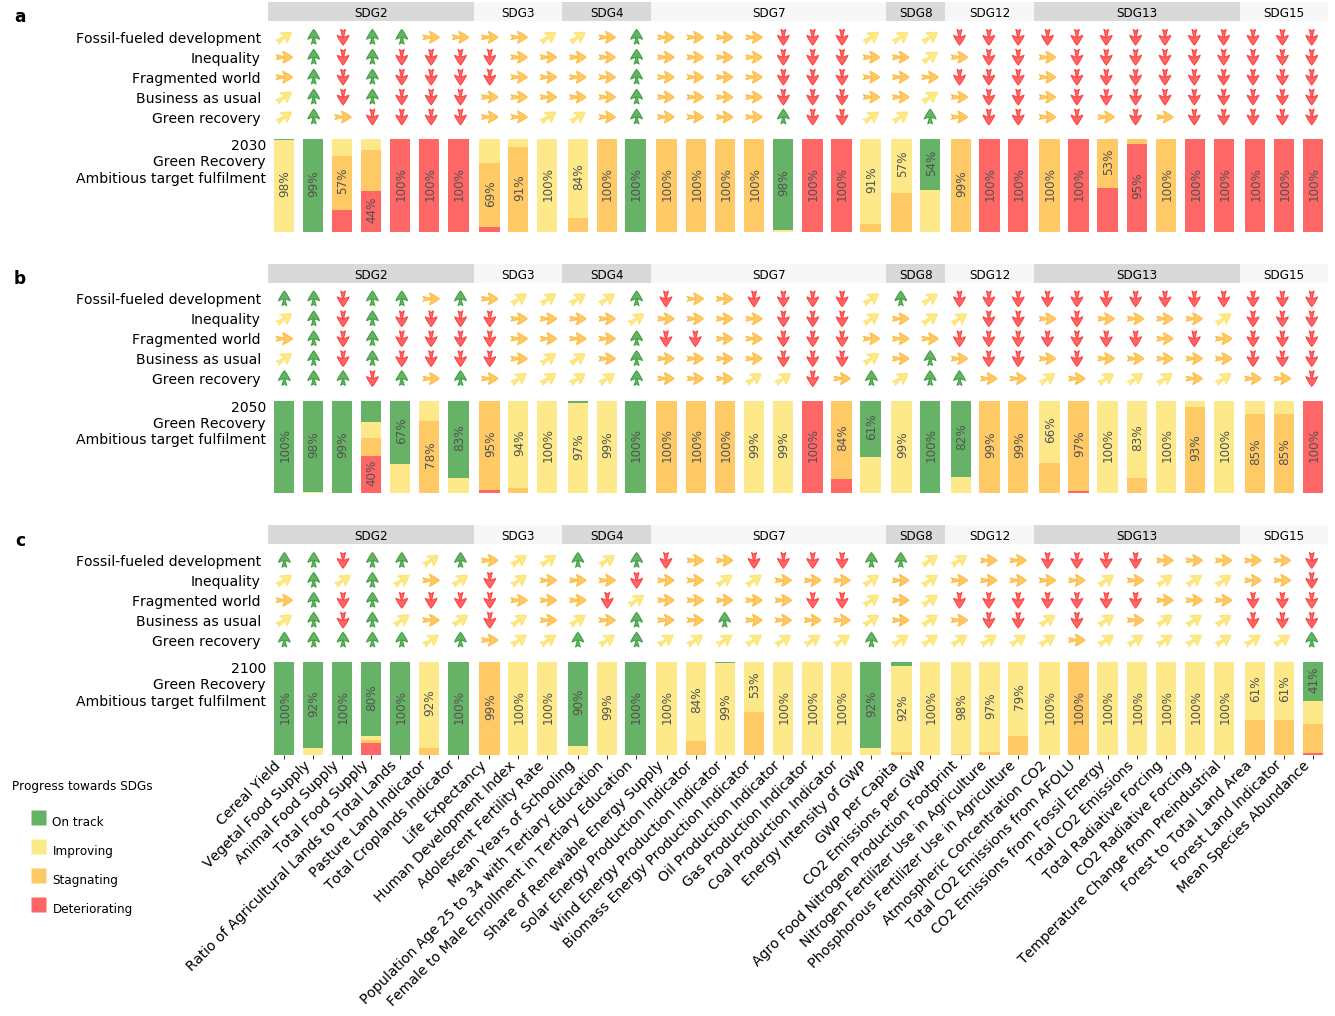

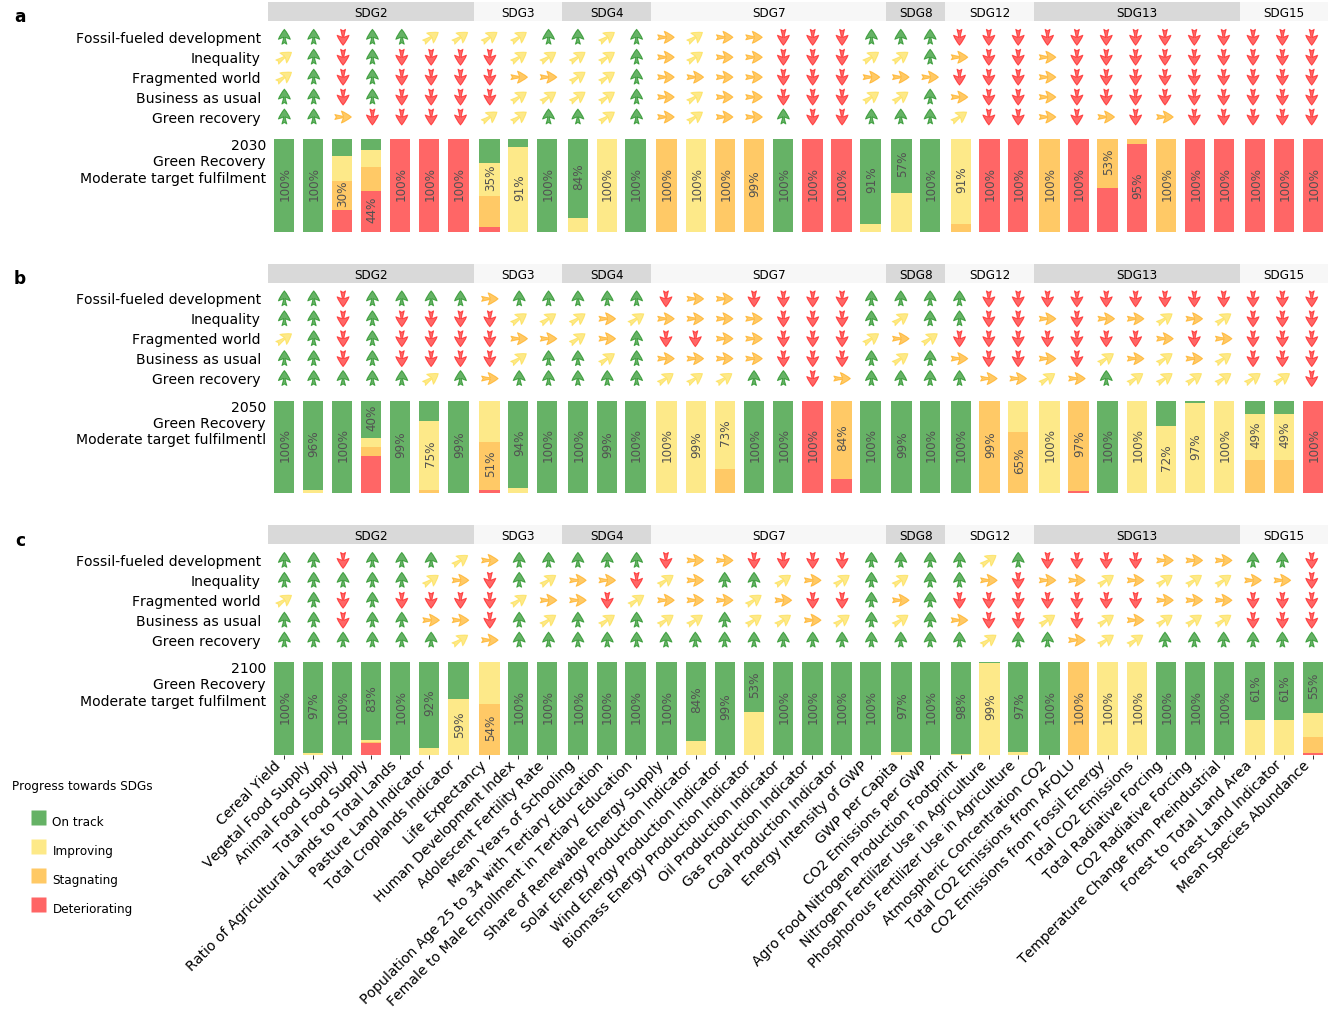

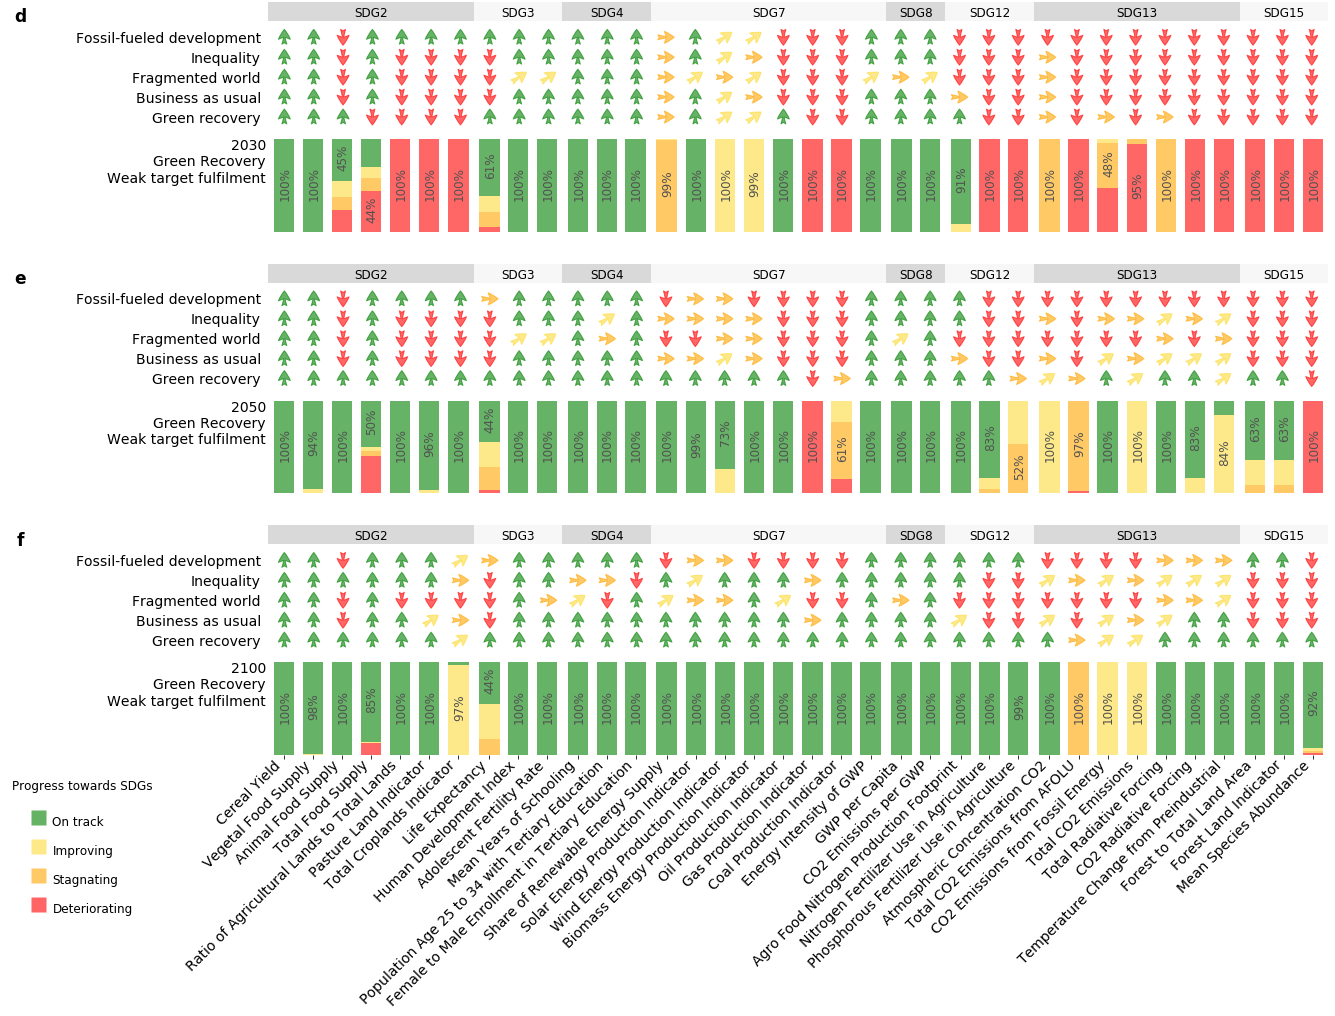

In [118]:
import matplotlib.patches as patches
from matplotlib.path import Path
from matplotlib.patches import BoxStyle
from matplotlib.lines import Line2D

# this class expands any textboxes to the width size of the subplot. We used it for drawing the SDG boxes on the top
class ExtendedTextBox(BoxStyle._Base):
    """
    An Extended Text Box that expands to the axes limits 
                        if set in the middle of the axes
    """

    def __init__(self, pad=0.3, width=500.):
        """
        width: 
            width of the textbox. 
            Use `ax.get_window_extent().width` 
                   to get the width of the axes.
        pad: 
            amount of padding (in vertical direction only)
        """
        self.width=width
        self.pad = pad
        super(ExtendedTextBox, self).__init__()

    def transmute(self, x0, y0, width, height, mutation_size):
        """
        x0 and y0 are the lower left corner of original text box
        They are set automatically by matplotlib
        """
        # padding
        pad = mutation_size * self.pad

        # we add the padding only to the box height
        height = height + 2.*pad
        # boundary of the padded box
        y0 = y0 - pad
        y1 = y0 + height
        _x0 = x0
        x0 = _x0 +width /2. - self.width/2.
        x1 = _x0 +width /2. + self.width/2.

        cp = [(x0, y0),
              (x1, y0), (x1, y1), (x0, y1),
              (x0, y0)]

        com = [Path.MOVETO,
               Path.LINETO, Path.LINETO, Path.LINETO,
               Path.CLOSEPOLY]

        path = Path(cp, com)

        return path


# Function for drawing pie chart scatter plot
def draw_pie(dist, 
             xpos, 
             ypos, 
             size,
             alpha, zorder,
             ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10,8))

    # for incremental pie slices
    cumsum = np.cumsum(dist)
    cumsum = cumsum/ cumsum[-1]
    pie = [0] + cumsum.tolist()

    i = 0
    for r1, r2 in zip(pie[:-1], pie[1:]):
        angles = np.linspace(2 * np.pi * r1, 2 * np.pi * r2)
        x = [0] + np.cos(angles).tolist()
        y = [0] + np.sin(angles).tolist()

        xy = np.column_stack([x, y])
        slice_color = {0:'green', 1:'#D8D8D8'}
        ax.scatter([xpos], [ypos], marker=xy, color=slice_color[i], edgecolors='none', alpha=alpha, s=size, zorder=zorder) #
        i += 1

    return ax    
     
dpi = 300

# register the custom style
BoxStyle._style_list["ext"] = ExtendedTextBox


target_year = {130:'2030', 150:'2050', 200:'2100'}
all_targets = [targets_2030, targets_2050, targets_2100]
target_level = {0: 'A', 1:'M', 2:'W'}

# Temporary indicator list to be used in plotting here. It's the same to the list of all indicators minus share of fossil energy
inds_remove = ['Share of Fossil Energy Supply']
inds_list = [x for x in indicator_list if x not in inds_remove]


# Separate the indicators (the entire list, not the major indicator) per each SDG
sdg_inds = {}
for i in ['2', '3', '4', '7', '8', '12', '13', '15']:
    sdg_inds[i] = df_ind1[df_ind1.ID.str.startswith(i)]['Target indicator'].to_list()
# Remove the share of fossil energy supply manually for SDG-SSP paper.
sdg_inds['7'] = [x for x in sdg_inds['7'] if x not in 'Share of Fossil Energy Supply']



# We used GridSpec for creating subplots with shared axis because we have the SSP arrows subplot on the top of other subplots with differnet ratio.
for t in [0, 1, 2]: #
    #Set the width ratio of subplots
    width_ratios = [7,3,3,8,2,3,7,3]
    
    fig = plt.figure(figsize=(19, 13.5))
    grid = plt.GridSpec(8, 8, hspace=0.08, wspace=0, width_ratios= width_ratios, 
                        height_ratios= [1.2,1,.4,1.2,1,.4,1.2,1])
    
    axes = {}
    axes_arr = {}
    #Create a dictionary of dataframes for the normalised value of outcomes in year 2030 
    #in different scenarios based on aambitious, moderate, and weak targets.
    for y, year in enumerate([130, 150, 200]):
        axes[1+y*3,0] = fig.add_subplot(grid[1+y*3, 0])
        for c in range(8):
            axes[1+y*3,c] = fig.add_subplot(grid[1+y*3, c])
        
        outcomes_norm = {}
        for s, scenario in enumerate(scenarios):
            outcomes_norm[scenario] = pd.DataFrame(columns=inds_list)
            for i, ind in enumerate(inds_list):
                out_norm = outcomes[scenario][ind][:, year]
                #For indicators where reduction in indicator value is desired
                if all_targets[y][ind][5] == 'lower is better':
                    outcomes_norm[scenario][ind] = np.where(out_norm > all_targets[y][ind][3],
                                                            -(abs(out_norm - all_targets[y][ind][3])/abs(all_targets[y][ind][t]-all_targets[y][ind][3]))*100, 
                                                            (abs(out_norm - all_targets[y][ind][3])/abs(all_targets[y][ind][t]-all_targets[y][ind][3]))*100)
                #For indicators where increase in indicator value is desired
                if all_targets[y][ind][5] == 'higher is better':
                    outcomes_norm[scenario][ind] = np.where(out_norm < all_targets[y][ind][3],
                                                            -(abs(out_norm - all_targets[y][ind][3])/abs(all_targets[y][ind][t]-all_targets[y][ind][3]))*100, 
                                                            (abs(out_norm - all_targets[y][ind][3])/abs(all_targets[y][ind][t]-all_targets[y][ind][3]))*100)

        # Identify in each indicators, how many futures meet the ambitious target at different levels (green, yellow, orange, red).
        df_count = {}
        df_sum = {} #this is not used anymore in new code

        for group_name in ['green', 'yellow', 'orange', 'red']:
            df_count[group_name] = pd.DataFrame(index=scenarios, columns=inds_list)
            df_sum[group_name] = pd.DataFrame(columns=inds_list)

        # Count scenarios for differnet levels of achivemengts.
        for s, sc in enumerate(scenarios):
            for i, ind in enumerate(inds_list):
                df_count['green'].loc[sc][ind] = outcomes_norm[sc][outcomes_norm[sc][ind] >= 100].count()[ind]
                df_count['yellow'].loc[sc][ind] = outcomes_norm[sc][(outcomes_norm[sc][ind] < 100) & (outcomes_norm[sc][ind] >= 50)].count()[ind]
                df_count['orange'].loc[sc][ind] = outcomes_norm[sc][(outcomes_norm[sc][ind] < 50) & (outcomes_norm[sc][ind] > 0)].count()[ind]
                df_count['red'].loc[sc][ind] = outcomes_norm[sc][outcomes_norm[sc][ind] <= 0].count()[ind]

        # Combine the count of scenarios across the SSPs (this is not used anymore in new code).
        for i, ind in enumerate(inds_list):
            for group_name in ['green', 'yellow','orange', 'red']:
                df_sum[group_name][ind] = [df_count[group_name][ind].sum()]



         # Develop the stacked bar charts for Green Recovery Pathway.
        for g, sdg in enumerate(['2','3', '4', '7', '8', '12','13', '15']): #
            x = sdg_inds[sdg]
            y_green = []
            y_red = []
            y_yellow = []
            y_orange = []
            for i, ind in enumerate(sdg_inds[sdg]):
                y_green.append(df_count['green'].loc['SSP1-26'][ind])
                y_yellow.append(df_count['yellow'].loc['SSP1-26'][ind])
                y_orange.append(df_count['orange'].loc['SSP1-26'][ind])
                y_red.append(df_count['red'].loc['SSP1-26'][ind])

            # Set the y position of each bar to start from
            bottom_yellow = [sum(x) for x in zip(y_red, y_orange)]
            bottom_green = [sum(x) for x in zip(y_red, y_yellow, y_orange)]
            axes[y*3+1, g].bar(x, y_red, width=.7, color='red', bottom=0, alpha=.6) # red
            axes[y*3+1, g].bar(x, y_orange, bottom=y_red, width=.7, color='orange', alpha=.6) # orange
            axes[y*3+1, g].bar(x, y_yellow, bottom=bottom_yellow, width=.7, color='#fddb3a', alpha=.6) # yellow
            axes[y*3+1, g].bar(x, y_green, bottom=bottom_green, width=.7, color='green',alpha=.6) # green


            # Get the y position of the bottom of each bar (stacked on the top of another)
            h = []
            for p in axes[y*3+1, g].patches:
                b = p.get_bbox()
                h.append(b.y0)

            # The iteration annotates all red bars at the bottom first and then all orange bars on the the top of red bars, and so on.
            bar_annot = []
            for p, pa in enumerate(axes[y*3+1, g].patches):      
                #if pa.get_height() > 1000: # Only annotate bars with enough height for annotation
                    # Convert the bar height to a percentage of total scenarios
                bar_annot.append((pa.get_height()/(number_sc))*100)

            bar_annot_inmax = []
            for p in range(len(sdg_inds[sdg])):
                # Create a list of percentage achivements per each indicator 
                bar_annot_list = [bar_annot[p], bar_annot[p+len(sdg_inds[sdg])],bar_annot[p+len(sdg_inds[sdg])*2],
                                  bar_annot[p+len(sdg_inds[sdg])*3]]
                # Find the index of the level of achivement with highest percentage for annotation per each indicator
                index_max = max(range(len(bar_annot_list)), key=bar_annot_list.__getitem__)
                bar_annot_inmax.append(p+len(sdg_inds[sdg])*index_max) # 4 is the number for levels achivements.

            for p, pa in enumerate(axes[y*3+1, g].patches):
                #if (bar_annot[p] > bar_annot[p+len(sdg_inds[sdg])])
                if p in bar_annot_inmax:
                    axes[y*3+1, g].annotate(str(int((pa.get_height()/(number_sc))*100))+'%', (pa.get_x()+pa.get_width()/2., pa.get_height()/2+h[p]), 
                                     ha='center', va='center', rotation=90, xytext=(1, 2),textcoords='offset points', 
                                          fontsize=12, fontweight='normal',color='#525252')

            # Remove all ticks and spines
            [s.set_visible(False) for s in axes[y*3+1, g].spines.values()]
            [t.set_visible(False) for t in axes[y*3+1, g].get_yticklines()]
            [t.set_visible(False) for t in axes[y*3+1, g].get_xticklines()]
            [l.set_visible(False) for l in axes[y*3+1, g].get_yticklabels()]
            [l.set_visible(False) for l in axes[y*3+1, g].get_xticklabels()]

            # Change the x axis label font size and rotate the label
            #axes[t+1+y*5, g].tick_params(axis='x', rotation=90, labelsize=13)
            
            if (y == 2):
                # Temprary code to correct two subplot title. This should be removed once it's corrected in the model var name in Vensim
                if sdg == '2':
                    sdg_temp = ['Cereal Yield','Vegetal Food Supply','Animal Food Supply','Total Food Supply',
                                'Ratio of Agricultural Lands to Total Lands','Pasture Land Indicator',
                                'Total Croplands Indicator']
                    axes[y*3+1, g].set_xticklabels(sdg_temp, fontsize=14, rotation=45, ha='right')
                else:
                    axes[y*3+1, g].set_xticklabels(sdg_inds[sdg], fontsize=14, rotation=45, ha='right')
                axes[y*3+1, g].tick_params(axis='x', pad=0)
                axes[y*3+1, g].xaxis.tick_bottom()
            else:
                axes[y*3+1, g].tick_params(labelbottom=False)
                
                

            # Reduce the x margines in plots. The margines should be proportional to the width ratio of the subplot.
            axes[y*3+1, g].margins(x=.2/width_ratios[g], y=0)
            
            facecolor = {'2':'#d9d9d9','3':'#f7f7f7', '4':'#d9d9d9', '7':'#f7f7f7', '8':'#d9d9d9', 
                         '12':'#f7f7f7','13':'#d9d9d9', '15':'#f7f7f7'}
            
            # Use the SDG titles f. 
            title = axes[y*3+1, g].set_title(sdg_names[sdg], size=12, pad=122, 
                                                  bbox=dict(facecolor=facecolor[sdg], edgecolor='none'), color='black')
            # set the box style of the xlabel text box toour custom box
            bb = title.get_bbox_patch()
            # use the axes' width as width of the text box
            bb.set_boxstyle("ext", pad=0.4, width=axes[y*3+1, g].get_window_extent().width )

    
    
        # Now we develop the SSP arrow scatter plot on the top of stacked bar charts.
        # Here we want to show if the world unfolds according to each SSP, what would be the most likely level of target achivement.
        #Note that that it's 'the most likely' level of achivement that has the maximum scenarios in the respective SSP. Therefore, that SSP can also lead to other achivement level, but the number of scenarios is smaller. 
    
        arrow_color = {0:'green', 1:'#fddb3a', 2:'orange', 3:'red'} # Here define the arrow colour
        ssp_ind = {}
        for s, sc in enumerate(scenarios):
            for ind, indx in enumerate(inds_list):
                ssp_char = []
                for group_name in ['green', 'yellow','orange', 'red']:
                    ssp_char.append(df_count[group_name].loc[sc][indx])
                    maxind = max(range(len(ssp_char)), key=ssp_char.__getitem__)
                    ssp_ind[(sc,indx)] = arrow_color[maxind]

        # Create an empty scatterplot with indicators in x axis and SSPs in y axis to use for annotaing arrows. Both indictors and arrows are represneted by indicative numbers to assit the positionning of arrows.
        axes_arr[y] = fig.add_subplot(grid[y*3, :])
        sc_list = [[0,1,2,3,4]]*len(inds_list)
        for xe, ye in zip ([i for i in range(len(inds_list))], sc_list):
            axes_arr[y].scatter([xe] * len(ye), ye, color='', zorder=10)
        axes_arr[y].margins(y=.05) 
        axes_arr[y].margins(x=0.005) # This aligns how the scatter points spread in x axis (use it to align the dots with x-ticks)


        for s, sc in enumerate(scenarios):
            for ind, indx in enumerate(inds_list):
                if ssp_ind[(sc,indx)] == arrow_color[0]: # green color
                    axes_arr[y].annotate("",xy=(ind, s+.5), xycoords='data', xytext=(ind, s-.45), textcoords='data',
                                arrowprops=dict(arrowstyle="fancy,head_length=1,head_width=1.2,tail_width=.5",
                                                connectionstyle="arc3", color='green', alpha=.6))
                if ssp_ind[(sc,indx)] == arrow_color[1]: # yellow color
                    axes_arr[y].annotate("",xy=(ind+.3, s+.3), xycoords='data', xytext=(ind-.3, s-.3), textcoords='data',
                                arrowprops=dict(arrowstyle="fancy,head_length=1,head_width=1.2,tail_width=.5",
                                                connectionstyle="arc3", color='#fddb3a', alpha=.6))
                if ssp_ind[(sc,indx)] == arrow_color[2]: # orange color
                    axes_arr[y].annotate("",xy=(ind+.35, s), xycoords='data', xytext=(ind-.35, s), textcoords='data',
                                arrowprops=dict(arrowstyle="fancy,head_length=1,head_width=1.2,tail_width=.5",
                                                connectionstyle="arc3", color='orange', alpha=.6))
                if ssp_ind[(sc,indx)] == arrow_color[3]: # red color
                    axes_arr[y].annotate("",xy=(ind, s-.5), xycoords='data', xytext=(ind, s+.5), textcoords='data',
                                arrowprops=dict(arrowstyle="fancy,head_length=1,head_width=1.2,tail_width=.5",
                                                connectionstyle="arc3", color='red', alpha=.6))
                
                # Count the number of green achivements per scenario for the pie chart
                #green_slice = df_count['green'].loc[sc][indx].item()
                #yellow_slice = df_count['yellow'].loc[sc][indx].item() 
                #orange_slice = df_count['orange'].loc[sc][indx].item() 
                #red_slice = df_count['red'].loc[sc][indx].item()
                grey_slice = df_count['green'].loc[sc][indx].item() + df_count['yellow'].loc[sc][indx].item() + df_count['orange'].loc[sc][indx].item() + df_count['red'].loc[sc][indx].item()     
                # Draw the pie chart
                draw_pie([grey_slice],ind,s,500, 
                         alpha=0, zorder=-100, ax=axes_arr[y])
        
        
        axes_arr[y].set_yticks(np.arange(len(scenarios)))
        axes_arr[y].set_yticklabels(['Green recovery', 'Business as usual', 
                                         'Fragmented world', 'Inequality', 
                                         'Fossil-fueled development'], fontsize=14, ha='right')
        #axes_arr[t].set_title('Most likely progress to '+target_year[year]+' moderate taregts', loc='left', ha='right', 



        # Remove all ticks and spines
        [s.set_visible(False) for s in axes_arr[y].spines.values()]
        [t.set_visible(False) for t in axes_arr[y].get_xticklines()]
        [t.set_visible(False) for t in axes_arr[y].get_yticklines()]
        [l.set_visible(False) for l in axes_arr[y].get_xticklabels()]


        # Set y-axis label to annoate the achivement levels
        target_label = {1:'2030\nGreen Recovery\nAmbitious target fulfilment', 2:'2050\nGreen Recovery\nAmbitious target fulfilment', 3:'2100\nGreen Recovery\nAmbitious target fulfilment',
                        4:'2030\nGreen Recovery\nModerate target fulfilment', 5:'2050\nGreen Recovery\nModerate target fulfilmentl', 6:'2100\nGreen Recovery\nModerate target fulfilment', 
                        7:'2030\nGreen Recovery\nWeak target fulfilment', 8:'2050\nGreen Recovery\nWeak target fulfilment', 9:'2100\nGreen Recovery\nWeak target fulfilment'}
        axes[1+y*3,0].set_ylabel(target_label[y+1+t*3], size=14, labelpad=2, rotation='horizontal', ha='right', position=(-0,.5))
        
        fig_label = {1:'a', 2:'b', 3:'c',
                        4:'a', 5:'b', 6:'c', 
                        7:'d', 8:'e', 9:'f'}    
        # Add all subplot labels
        axes_arr[y].text(-9, 5, fig_label[y+1+t*3], fontsize=17, fontweight='heavy', rotation=0,
                            horizontalalignment='center', verticalalignment='center')

    # Create legend
    legend_elements = []

    legend_colors = ['green', '#fddb3a', 'orange', 'red']
    legend_labels = ['On track', 'Improving', 'Stagnating', 'Deteriorating']

    for i in range(4):
        legend_elements.append(Line2D([0], [0], marker="s", color='none', label=legend_labels[i], 
                                      markersize=15, markeredgecolor='none', markerfacecolor=legend_colors[i], alpha=0.6))

    fig.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(-.07, .06, .5, .05), frameon=False, 
               bbox_transform=fig.transFigure, ncol=1, title="Progress towards SDGs\n", title_fontsize='large',
               handlelength=1, columnspacing=1, handletextpad=.7, labelspacing=.01, fontsize=12, handleheight=3.3)
 

    plt.savefig('{}/SSPs_SDGs_boxarrows_{}_maintext.pdf'.format(r'N:/Planet-A/Current-Users/Enayat-Moallemi/Moallemi_et_al_SDG_SSP_Assessment/Fig/',target_level[t]), dpi=600,  bbox_inches='tight')
    #plt.savefig('{}/SSPs_SDGs_boxarrows_extended_v4_{}_maintext_300dpi.png'.format(r'N:/Planet-A/Current-Users/Enayat-Moallemi/Moallemi_et_al_SDG_SSP_Assessment/Fig/',t), dpi=300,  bbox_inches='tight')
    #plt.savefig('{}/SSPs_SDGs_boxarrows_extended_v4_{}_maintext.png'.format(r'N:/Planet-A/Current-Users/Enayat-Moallemi/Moallemi_et_al_SDG_SSP_Assessment/Fig/',t), dpi=600,  bbox_inches='tight')


## Progress per SDG (main text) - Green Recovery

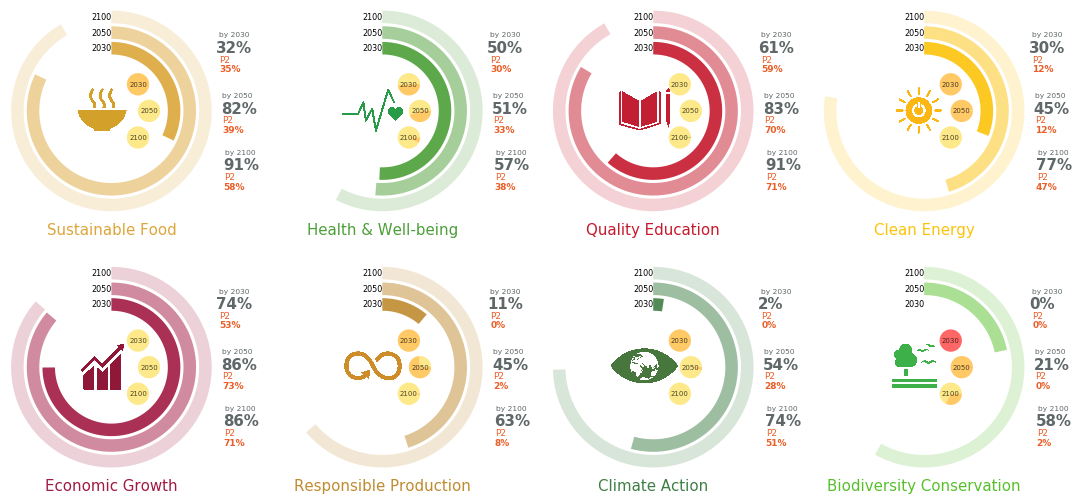

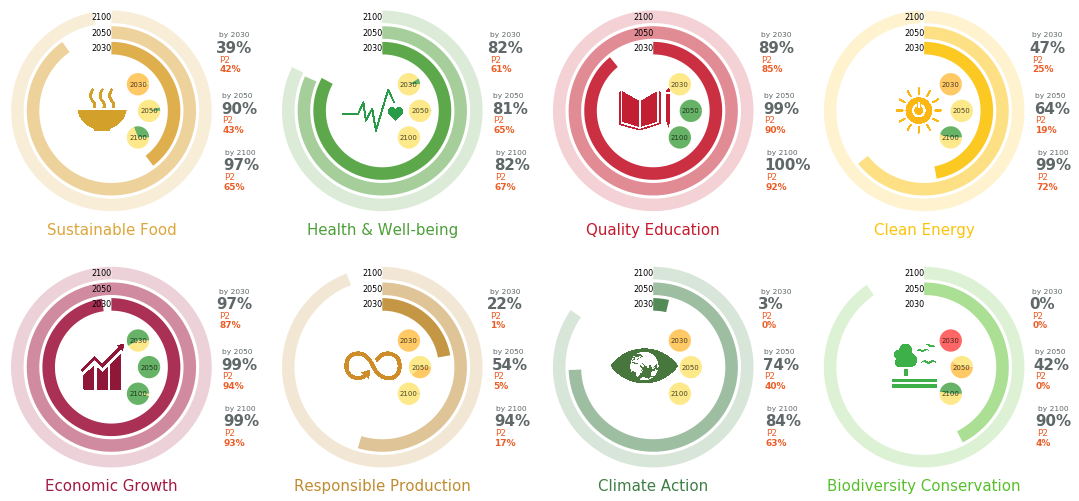

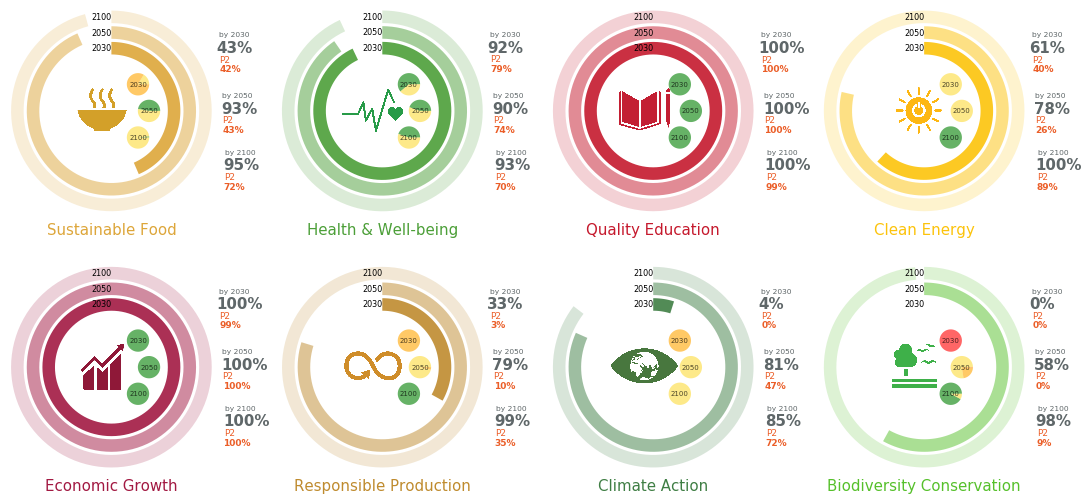

In [111]:
import itertools
import matplotlib as mpl
import matplotlib.image as mpimg
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox


# Set the target years, target levels to plot
target_year = {130:'2030', 150:'2050', 200:'2100'}
all_targets = [targets_2030, targets_2050, targets_2100]
target_level = {0: 'A', 1:'M', 2:'W'}
s_names = {'SSP1-26': 'P1', 'SSP2-45': 'P2', 
             'SSP3-70': 'P3', 'SSP4-60': 'P4', 'SSP5-85': 'P5'}

# Temporary indicator list to be used in plotting here. It's the same to the list of all indicators minus share of fossil energy
inds_remove = ['Share of Fossil Energy Supply']
inds_list = [x for x in indicator_list if x not in inds_remove]


# Separate the indicators (the entire list, not the major indicator) per each SDG
sdg_inds = {}
for i in ['2', '3', '4', '7', '8', '12', '13', '15']:
    sdg_inds[i] = df_ind1[df_ind1.ID.str.startswith(i)]['Target indicator'].to_list() 
# Remove the share of fossil energy supply manually for SDG-SSP paper.
sdg_inds['7'] = [x for x in sdg_inds['7'] if x not in 'Share of Fossil Energy Supply']

# Function for drawing pie chart scatter plot
def draw_pie(dist, 
             xpos, 
             ypos, 
             size,
             alpha,
             ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10,8))

    # for incremental pie slices
    cumsum = np.cumsum(dist)
    cumsum = cumsum/ cumsum[-1]
    pie = [0] + cumsum.tolist()

    i = 0
    for r1, r2 in zip(pie[:-1], pie[1:]):
        angles = np.linspace(2 * np.pi * r1, 2 * np.pi * r2)
        x = [0] + np.cos(angles).tolist()
        y = [0] + np.sin(angles).tolist()
        xy = np.column_stack([x, y])
        slice_color = {0:'green', 1:'#fddb3a', 2:'orange', 3:'red'} #
        ax.scatter([xpos], [ypos], marker=xy, color=slice_color[i], edgecolors='none', alpha=alpha, s=size) #
        i += 1

    return ax



"""
First, compute the progress at the indicator and goal levels.
"""

# Compute the progress per SSP, per target year, per target level, at the indicator level.
outcomes_norm_dict = {}
for y, year in enumerate(list(target_year.keys())):
    for s, ssp in enumerate(scenarios):
        for t in list(target_level.keys()):
            outcomes_norm = {}
            outcomes_norm[ssp] = pd.DataFrame(columns=inds_list)
            for i, ind in enumerate(inds_list):
                out_norm = outcomes[ssp][ind][:, year]
                #For indicators where reduction in indicator value is desired
                if all_targets[y][ind][5] == 'lower is better':
                    outcomes_norm[ssp][ind] = np.where(out_norm > all_targets[y][ind][3],
                                                            -(abs(out_norm - all_targets[y][ind][3])/abs(all_targets[y][ind][t]-all_targets[y][ind][3]))*100, 
                                                            (abs(out_norm - all_targets[y][ind][3])/abs(all_targets[y][ind][t]-all_targets[y][ind][3]))*100)
                #For indicators where increase in indicator value is desired
                if all_targets[y][ind][5] == 'higher is better':
                    outcomes_norm[ssp][ind] = np.where(out_norm < all_targets[y][ind][3],
                                                            -(abs(out_norm - all_targets[y][ind][3])/abs(all_targets[y][ind][t]-all_targets[y][ind][3]))*100, 
                                                            (abs(out_norm - all_targets[y][ind][3])/abs(all_targets[y][ind][t]-all_targets[y][ind][3]))*100)
            # Replace progress higher than 100% with 100 and lower than 0 by zero
            outcomes_norm[ssp][outcomes_norm[ssp] >= 100] = 100
            outcomes_norm[ssp][outcomes_norm[ssp] <= 0] = 0
            # Savel the results in a dictionary to use for plotting the pie charts
            outcomes_norm_dict[(ssp, target_year[year], target_level[t])] = outcomes_norm[ssp]       
            

        
# Identify in each SDG, how many futures meet the ambitious target at different levels (green, yellow, orange, red).
# this will be used for plotting the pie charts
df_count = {}
for group_name in ['green', 'yellow', 'orange', 'red']:
    for t in list(target_level.values()):
        for year in list(target_year.values()):
            df_count[(year, t, group_name)] = pd.DataFrame(index=scenarios, columns=list(sdg_names.keys()))

# Count the number of scenarios for differnet types of achivemengts, 
# but only for the target year 2100 (because SSP timeframe is till 2100) .
for t in list(target_level.keys()):
    for s, ssp in enumerate(scenarios):
        for y, year in enumerate(list(target_year.keys())):
            out = outcomes_norm_dict[(ssp, target_year[year], target_level[t])]
            for g, sdg in enumerate(list(sdg_names.keys())):
                out_sdg = out[sdg_inds[sdg]].sum(axis=1)/len(sdg_inds[sdg])
                df_count[(target_year[year], target_level[t], 'green')].loc[ssp][sdg] = out_sdg[out_sdg >= 100].count()
                df_count[(target_year[year], target_level[t], 'yellow')].loc[ssp][sdg] = out_sdg[(out_sdg < 100) & (out_sdg >= 50)].count()
                df_count[(target_year[year], target_level[t], 'orange')].loc[ssp][sdg] = out_sdg[(out_sdg < 50) & (out_sdg > 0)].count()
                df_count[(target_year[year], target_level[t], 'red')].loc[ssp][sdg] = out_sdg[out_sdg <= 0].count()        

        
"""
Second, develop circular bar plots with their markers
"""


g_list = ['Sustainable Food', 'Health & Well-being', 'Quality Education', 'Clean Energy', 'Economic Growth', 
          'Responsible Production', 'Climate Action', 'Biodiversity Conservation' ]

for t in list(target_level.keys()): #
    
    # Compute the Green Recovery and other pathways for cicular bar charts 
    y_bar = {} #to record the position of each pathway in barchart
    range_ssp = {} # to record the wors and best pathway for annotation
    for y, year in enumerate(list(target_year.keys())):   
        for g, sdg in enumerate(list(sdg_names.keys())):
            for s, ssp in enumerate(scenarios):
                norm_df = outcomes_norm_dict[(ssp, target_year[year], target_level[t])]

                # Compute an arthmatic average of of all indicators related to one SDG and use it as the mean
                sdg_norm = norm_df[sdg_inds[sdg]].sum(axis=1)/len(sdg_inds[sdg])
                y_bar[(ssp, target_year[year], sdg_names[sdg])] = np.mean(sdg_norm)*360/100 # convert it to degree for polar projection
                #err_ssp = np.mean(sdg_norm)
                
            # Compute the best-case and worst-case progress for annotation across SSPs. Note that annotation is only for moderate targets
            err_ssp = {}
            for s, ssp in enumerate(scenarios):
                # In each SSP
                norm_df_ssp = outcomes_norm_dict[(ssp, target_year[year], target_level[t])]
                # Compute an arthmatic average of of all indicators related to one SDG and use it as the mean
                sdg_norm_ssp = norm_df_ssp[sdg_inds[sdg]].sum(axis=1)/len(sdg_inds[sdg])
                err_ssp[ssp] = np.mean(sdg_norm_ssp)
            # The worst-case progress is the lowest progress among the SSPs.
            min_ssp = min(err_ssp.values())
            min_ssp_key = min(err_ssp, key=err_ssp.get)
            # The best case progress is the highest progress among the SSPs.
            max_ssp = max(err_ssp.values())
            max_ssp_key = max(err_ssp, key=err_ssp.get)
            # Only for target level moderate
            range_ssp[(target_level[t], target_year[year], sdg_names[sdg])] = (min_ssp, min_ssp_key, max_ssp, max_ssp_key)

            
            
    # Create the figure
    fig = plt.figure(figsize=(18.3, 9))
    axes = {}
    grid = plt.GridSpec(2, 4, hspace=.1, wspace=.3)
    for i, j in itertools.product(range(2), range(4)):
        axes[i,j] = fig.add_subplot(grid[i,j], projection='polar')
        
    i = 0
    j = 0
    for g, sdg in enumerate(list(sdg_names.keys())): #list(sdg_names.keys())

        if g == 4:
            i = 1 # To move to the second row of the figure
            j = 0 # To reset the column number of the subplots

        # Plot the progress levels by 2030, 2050, 2100 as cicular horizontal bar charts for Green Recovery
        axes[i,j].barh(2, np.radians(y_bar[('SSP1-26','2030', sdg_names[sdg])]), color=sdg_colors[sdg], alpha=.9, height=.4) #'#c7b198'
        axes[i,j].barh(2.5, np.radians(y_bar[('SSP1-26', '2050', sdg_names[sdg])]), color=sdg_colors[sdg], alpha=.5, height=.4) #'#dfd3c3'
        axes[i,j].barh(3, np.radians(y_bar[('SSP1-26', '2100', sdg_names[sdg])]), color=sdg_colors[sdg], alpha=.2, height=.4) #'#f0ece3'

        # Plot the eothre pathway markers by 2030, 2050, 2100 (currently not in use)
        #m_style = {0:"1", 1:"D", 2:"x", 3:"*"}
        #for s, ssp in enumerate(['SSP2-45', 'SSP3-70','SSP4-60','SSP5-85']):
            #for y, year in enumerate(list(target_year.keys())): 
                #theta_err = np.radians(y_bar[(ssp,target_year[year], sdg_names[sdg])])
                #r_err = 2+.5*y+0*theta_err
                #axes[i,j].plot(theta_err, r_err, marker=m_style[s], linestyle="", alpha=0.8, color="r")


        """
        Third, I develop scatter pie charts for the pathways by 2030, 2050, 2100.
        """
        y_list = ['2030', '2050', '2100']
        for y, year in enumerate(list(target_year.keys())):
            green_slice = df_count[(target_year[year], target_level[t],'green')].loc['SSP1-26'][sdg].item()
            yellow_slice = df_count[(target_year[year], target_level[t],'yellow')].loc['SSP1-26'][sdg].item() 
            orange_slice = df_count[(target_year[year], target_level[t],'orange')].loc['SSP1-26'][sdg].item() 
            red_slice = df_count[(target_year[year], target_level[t],'red')].loc['SSP1-26'][sdg].item()
            draw_pie([green_slice,yellow_slice,orange_slice,red_slice],np.radians(45+y*45),1.2,500, 
                     alpha=.6, ax=axes[i,j])
            axes[i,j].text(np.radians(45+y*45),1.2, y_list[y], fontsize=7, color='black', alpha=.7, 
                           fontweight='normal', rotation=0,
                            horizontalalignment='center', verticalalignment='center')


        """
        Fourth, I annotate progress percentage in three target years for moderate target level and format the plot.
        """

        axes[i,j].set_theta_zero_location('N')
        axes[i,j].set_theta_direction(-1)
        axes[i,j].set_rlabel_position(0)
        #axes[i,j].set_thetagrids([0, 90, 180, 270], labels=[0, 25, 50, 75])
        axes[i,j].set_rgrids([2, 2.5, 3], labels=['2030', '2050', '2100'], fontsize=8, ha='right', va='center')
        axes[i,j].spines['polar'].set_visible(False)
        axes[i,j].grid(False)
        axes[i,j].set_thetagrids([], visible=False)
        #axes[i,j].set_rgrids([], visible=False)

        
        # 2030
        # y_bar annotate only moderate target level. range_ssp annotate worst case and best scenaario based on ambitious and weak target. 100/360 multiplier is to convert from polar degree to actual percentage

        # Calculate the progress

        progress_mean={} # Green recovery progress
        progress_bau={} # BAU progress
        progress_min={} # Worst pathway progress
        for ty in ['2030', '2050', '2100']:
            if int(y_bar[('SSP1-26',ty, sdg_names[sdg])]*100/360) < 0:
                   progress_mean[ty] = '0'
            else: 
                   progress_mean[ty] = str(int(y_bar[('SSP1-26',ty, sdg_names[sdg])]*100/360))

            if int(y_bar[('SSP2-45',ty, sdg_names[sdg])]*100/360) < 0:
                   progress_bau[ty] = '0'
            else: 
                   progress_bau[ty] = str(int(y_bar[('SSP2-45',ty, sdg_names[sdg])]*100/360))

            if int(range_ssp[(target_level[t],ty, sdg_names[sdg])][0]) < 0:
                   progress_min[ty] = '0'
            else: 
                   progress_min[ty] = str(int(range_ssp[(target_level[t],ty, sdg_names[sdg])][0]))


        # 2030       
        axes[i,j].text(.98, 4.15, 'by 2030\n', fontsize=7.5, color='#5f6769', fontweight='normal', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        axes[i,j].text(1.03, 3.9, progress_mean['2030']+'%', fontsize=15, color='#5f6769',fontweight='heavy', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        axes[i,j].text(1.125, 3.8, 'P2', fontsize=9, color='#eb5e28',fontweight='normal', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        axes[i,j].text(1.2, 3.7, progress_bau['2030']+'%', fontsize=9, color='#eb5e28',fontweight='heavy', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        #axes[i,j].text(1.21, 4.6, s_names[range_ssp[(target_level[t],'2030', sdg_names[sdg])][1]], fontsize=9, color='#68d0f3',fontweight='normal', rotation=0,
                            #horizontalalignment='left', verticalalignment='center')
        #axes[i,j].text(1.265, 4.45, progress_min['2030']+'%', fontsize=9, color='#1fb4ee',fontweight='heavy', rotation=0,
                            #horizontalalignment='left', verticalalignment='center')


        # 2050
        axes[i,j].text(1.46, 3.55, 'by 2050\n', fontsize=7.5, color='#5f6769', fontweight='normal', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        # y_bar annotate only moderate target level
        axes[i,j].text(1.55, 3.5, progress_mean['2050']+'%', fontsize=15, color='#5f6769', fontweight='heavy', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        axes[i,j].text(1.65, 3.55, 'P2', fontsize=9, color='#eb5e28',fontweight='normal', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        axes[i,j].text(1.738, 3.6, progress_bau['2050']+'%', fontsize=9, color='#eb5e28',fontweight='heavy', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        #axes[i,j].text(1.64, 4.25, s_names[range_ssp[(target_level[t],'2050', sdg_names[sdg])][1]], fontsize=9, color='#68d0f3',fontweight='normal', rotation=0,
                            #horizontalalignment='left', verticalalignment='center')
        #axes[i,j].text(1.709, 4.3, progress_min['2050']+'%', fontsize=9, color='#1fb4ee',fontweight='heavy', rotation=0,
                            #horizontalalignment='left', verticalalignment='center')

        # 2100
        axes[i,j].text(1.95, 3.9, 'by 2100\n', fontsize=7.5, color='#5f6769', fontweight='normal', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        # y_bar annotate only moderate target level
        axes[i,j].text(2.02, 3.95, progress_mean['2100']+'%', fontsize=15, color='#5f6769', fontweight='heavy', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        axes[i,j].text(2.1, 4.17, 'P2', fontsize=9, color='#eb5e28',fontweight='normal', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        axes[i,j].text(2.166, 4.31, progress_bau['2100']+'%', fontsize=9, color='#eb5e28',fontweight='heavy', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        #axes[i,j].text(2.02, 4.8, s_names[range_ssp[(target_level[t],'2100', sdg_names[sdg])][1]], fontsize=9, color='#68d0f3',fontweight='normal', rotation=0,
                            #horizontalalignment='left', verticalalignment='center')
        #axes[i,j].text(2.084, 4.95, progress_min['2100']+'%', fontsize=9, color='#1fb4ee',fontweight='heavy', rotation=0,
                            #horizontalalignment='left', verticalalignment='center')


        axes[i,j].text(np.radians(180), 3.8, g_list[g], fontsize=15, color=sdg_colors[sdg], fontweight='normal', 
                       rotation=0, horizontalalignment='center', verticalalignment='center')

        # Print the SDG icon
        img_dir = 'N:/Planet-A/Current-Users/Enayat-Moallemi/Moallemi_et_al_SDG_SSP_Assessment/Fig/SDG_icons/'
        img = mpimg.imread(img_dir+str(sdg)+'.png')
        imagebox = OffsetImage(img, zoom=0.03)
        if sdg == '7':
            ab = AnnotationBbox(imagebox, (275, .2), xycoords='data', frameon=False) # the XY in annotation is based on theta (0-360) and r
        else:
            ab = AnnotationBbox(imagebox, (275, .3), xycoords='data', frameon=False) # the XY in annotation is based on theta (0-360) and r
        axes[i,j].add_artist(ab)
        j += 1

    #plt.savefig('{}/SSPs_SDGs_sum_maintext_300dpi.png'.format(r'C:/Users/moallemie/GitHub/SSPs_SDGs_Assessment/Fig/'), dpi=300,  bbox_inches='tight') 
    plt.savefig('{}/SSPs_SDGs_GR_{}.png'.format(r'N:/Planet-A/Current-Users/Enayat-Moallemi/Moallemi_et_al_SDG_SSP_Assessment/Fig/', target_level[t]), dpi=600,  bbox_inches='tight') 
    #plt.savefig('{}/SSPs_SDGs_sum_maintext.pdf'.format(r'C:/Users/moallemie/GitHub/SSPs_SDGs_Assessment/Fig/'), dpi=600,  bbox_inches='tight') 
    #plt.savefig('{}/SSPs_SDGs_sum_maintext.svg'.format(r'C:/Users/moallemie/GitHub/SSPs_SDGs_Assessment/Fig/'), dpi=600,  bbox_inches='tight') 



## Progress per SDG (main text) - Fragmented World

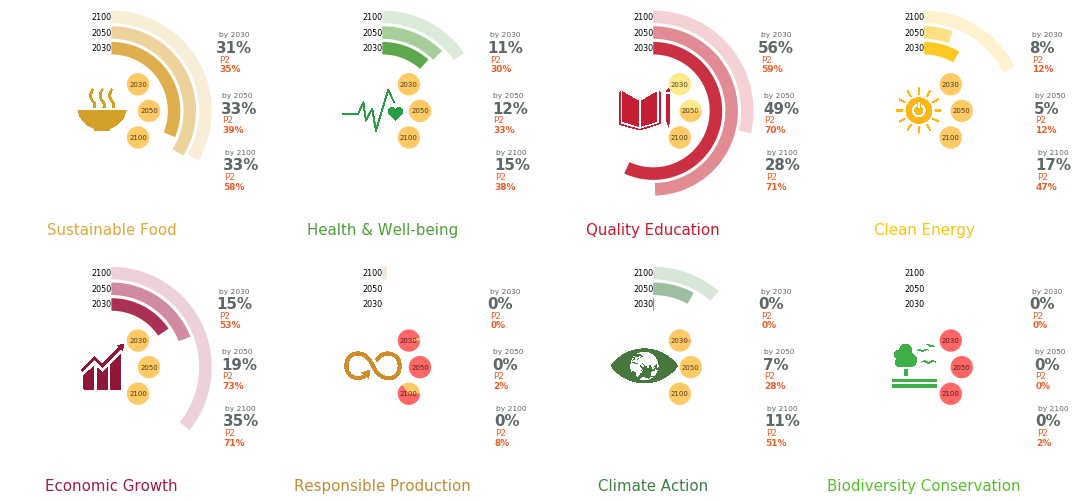

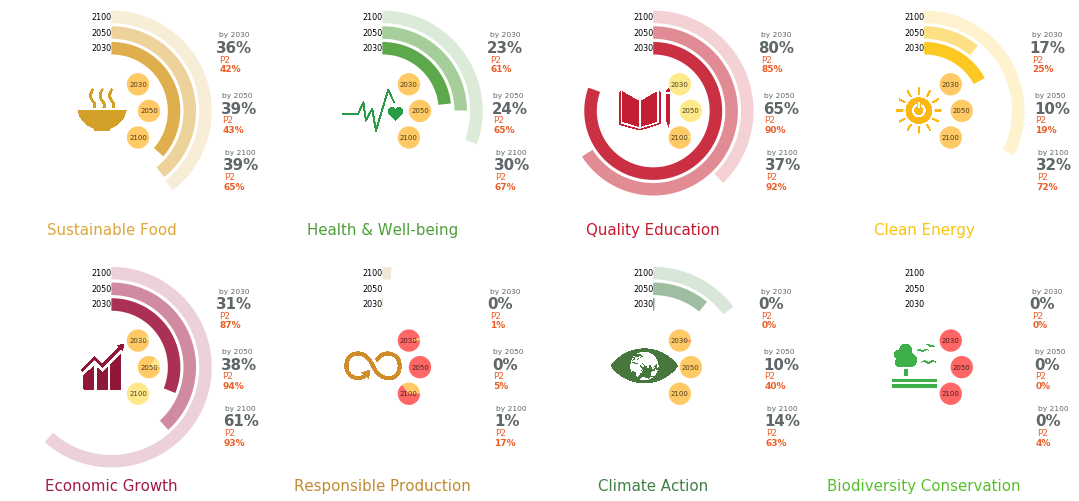

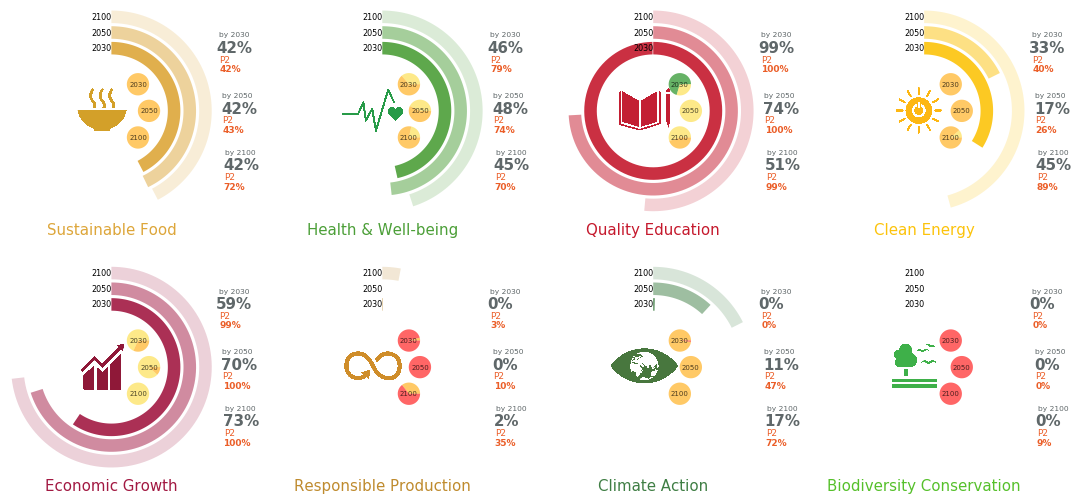

In [112]:
import itertools
import matplotlib as mpl
import matplotlib.image as mpimg
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox


# Set the target years, target levels to plot
target_year = {130:'2030', 150:'2050', 200:'2100'}
all_targets = [targets_2030, targets_2050, targets_2100]
target_level = {0: 'A', 1:'M', 2:'W'}
s_names = {'SSP1-26': 'P1', 'SSP2-45': 'P2', 
             'SSP3-70': 'P3', 'SSP4-60': 'P4', 'SSP5-85': 'P5'}

# Temporary indicator list to be used in plotting here. It's the same to the list of all indicators minus share of fossil energy
inds_remove = ['Share of Fossil Energy Supply']
inds_list = [x for x in indicator_list if x not in inds_remove]


# Separate the indicators (the entire list, not the major indicator) per each SDG
sdg_inds = {}
for i in ['2', '3', '4', '7', '8', '12', '13', '15']:
    sdg_inds[i] = df_ind1[df_ind1.ID.str.startswith(i)]['Target indicator'].to_list() 
# Remove the share of fossil energy supply manually for SDG-SSP paper.
sdg_inds['7'] = [x for x in sdg_inds['7'] if x not in 'Share of Fossil Energy Supply']

# Function for drawing pie chart scatter plot
def draw_pie(dist, 
             xpos, 
             ypos, 
             size,
             alpha,
             ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10,8))

    # for incremental pie slices
    cumsum = np.cumsum(dist)
    cumsum = cumsum/ cumsum[-1]
    pie = [0] + cumsum.tolist()

    i = 0
    for r1, r2 in zip(pie[:-1], pie[1:]):
        angles = np.linspace(2 * np.pi * r1, 2 * np.pi * r2)
        x = [0] + np.cos(angles).tolist()
        y = [0] + np.sin(angles).tolist()
        xy = np.column_stack([x, y])
        slice_color = {0:'green', 1:'#fddb3a', 2:'orange', 3:'red'} #
        ax.scatter([xpos], [ypos], marker=xy, color=slice_color[i], edgecolors='none', alpha=alpha, s=size) #
        i += 1

    return ax



"""
First, compute the progress at the indicator and goal levels.
"""

# Compute the progress per SSP, per target year, per target level, at the indicator level.
outcomes_norm_dict = {}
for y, year in enumerate(list(target_year.keys())):
    for s, ssp in enumerate(scenarios):
        for t in list(target_level.keys()):
            outcomes_norm = {}
            outcomes_norm[ssp] = pd.DataFrame(columns=inds_list)
            for i, ind in enumerate(inds_list):
                out_norm = outcomes[ssp][ind][:, year]
                #For indicators where reduction in indicator value is desired
                if all_targets[y][ind][5] == 'lower is better':
                    outcomes_norm[ssp][ind] = np.where(out_norm > all_targets[y][ind][3],
                                                            -(abs(out_norm - all_targets[y][ind][3])/abs(all_targets[y][ind][t]-all_targets[y][ind][3]))*100, 
                                                            (abs(out_norm - all_targets[y][ind][3])/abs(all_targets[y][ind][t]-all_targets[y][ind][3]))*100)
                #For indicators where increase in indicator value is desired
                if all_targets[y][ind][5] == 'higher is better':
                    outcomes_norm[ssp][ind] = np.where(out_norm < all_targets[y][ind][3],
                                                            -(abs(out_norm - all_targets[y][ind][3])/abs(all_targets[y][ind][t]-all_targets[y][ind][3]))*100, 
                                                            (abs(out_norm - all_targets[y][ind][3])/abs(all_targets[y][ind][t]-all_targets[y][ind][3]))*100)
            # Replace progress higher than 100% with 100 and lower than 0 by zero
            outcomes_norm[ssp][outcomes_norm[ssp] >= 100] = 100
            outcomes_norm[ssp][outcomes_norm[ssp] <= 0] = 0
            # Savel the results in a dictionary to use for plotting the pie charts
            outcomes_norm_dict[(ssp, target_year[year], target_level[t])] = outcomes_norm[ssp]       
            

        
# Identify in each SDG, how many futures meet the ambitious target at different levels (green, yellow, orange, red).
# this will be used for plotting the pie charts
df_count = {}
for group_name in ['green', 'yellow', 'orange', 'red']:
    for t in list(target_level.values()):
        for year in list(target_year.values()):
            df_count[(year, t, group_name)] = pd.DataFrame(index=scenarios, columns=list(sdg_names.keys()))

# Count the number of scenarios for differnet types of achivemengts, 
# but only for the target year 2100 (because SSP timeframe is till 2100) .
for t in list(target_level.keys()):
    for s, ssp in enumerate(scenarios):
        for y, year in enumerate(list(target_year.keys())):
            out = outcomes_norm_dict[(ssp, target_year[year], target_level[t])]
            for g, sdg in enumerate(list(sdg_names.keys())):
                out_sdg = out[sdg_inds[sdg]].sum(axis=1)/len(sdg_inds[sdg])
                df_count[(target_year[year], target_level[t], 'green')].loc[ssp][sdg] = out_sdg[out_sdg >= 100].count()
                df_count[(target_year[year], target_level[t], 'yellow')].loc[ssp][sdg] = out_sdg[(out_sdg < 100) & (out_sdg >= 50)].count()
                df_count[(target_year[year], target_level[t], 'orange')].loc[ssp][sdg] = out_sdg[(out_sdg < 50) & (out_sdg > 0)].count()
                df_count[(target_year[year], target_level[t], 'red')].loc[ssp][sdg] = out_sdg[out_sdg <= 0].count()     

        
"""
Second, develop circular bar plots with their markers
"""


g_list = ['Sustainable Food', 'Health & Well-being', 'Quality Education', 'Clean Energy', 'Economic Growth', 
          'Responsible Production', 'Climate Action', 'Biodiversity Conservation' ]

for t in list(target_level.keys()): #
    
    # Compute the Green Recovery and other pathways for cicular bar charts 
    y_bar = {} #to record the position of each pathway in barchart
    range_ssp = {} # to record the wors and best pathway for annotation
    for y, year in enumerate(list(target_year.keys())):   
        for g, sdg in enumerate(list(sdg_names.keys())):
            for s, ssp in enumerate(scenarios):
                norm_df = outcomes_norm_dict[(ssp, target_year[year], target_level[t])]

                # Compute an arthmatic average of of all indicators related to one SDG and use it as the mean
                sdg_norm = norm_df[sdg_inds[sdg]].sum(axis=1)/len(sdg_inds[sdg])
                y_bar[(ssp, target_year[year], sdg_names[sdg])] = np.mean(sdg_norm)*360/100 # convert it to degree for polar projection
                #err_ssp = np.mean(sdg_norm)
                
            # Compute the best-case and worst-case progress for annotation across SSPs. Note that annotation is only for moderate targets
            err_ssp = {}
            for s, ssp in enumerate(scenarios):
                # In each SSP
                norm_df_ssp = outcomes_norm_dict[(ssp, target_year[year], target_level[t])]
                # Compute an arthmatic average of of all indicators related to one SDG and use it as the mean
                sdg_norm_ssp = norm_df_ssp[sdg_inds[sdg]].sum(axis=1)/len(sdg_inds[sdg])
                err_ssp[ssp] = np.mean(sdg_norm_ssp)
            # The worst-case progress is the lowest progress among the SSPs.
            min_ssp = min(err_ssp.values())
            min_ssp_key = min(err_ssp, key=err_ssp.get)
            # The best case progress is the highest progress among the SSPs.
            max_ssp = max(err_ssp.values())
            max_ssp_key = max(err_ssp, key=err_ssp.get)
            # Only for target level moderate
            range_ssp[(target_level[t], target_year[year], sdg_names[sdg])] = (min_ssp, min_ssp_key, max_ssp, max_ssp_key)

            
            
    # Create the figure
    fig = plt.figure(figsize=(18.3, 9))
    axes = {}
    grid = plt.GridSpec(2, 4, hspace=.1, wspace=.3)
    for i, j in itertools.product(range(2), range(4)):
        axes[i,j] = fig.add_subplot(grid[i,j], projection='polar')
        
    i = 0
    j = 0
    for g, sdg in enumerate(list(sdg_names.keys())): #list(sdg_names.keys())

        if g == 4:
            i = 1 # To move to the second row of the figure
            j = 0 # To reset the column number of the subplots

        # Plot the progress levels by 2030, 2050, 2100 as cicular horizontal bar charts for Green Recovery
        axes[i,j].barh(2, np.radians(y_bar[('SSP3-70','2030', sdg_names[sdg])]), color=sdg_colors[sdg], alpha=.9, height=.4) #'#c7b198'
        axes[i,j].barh(2.5, np.radians(y_bar[('SSP3-70', '2050', sdg_names[sdg])]), color=sdg_colors[sdg], alpha=.5, height=.4) #'#dfd3c3'
        axes[i,j].barh(3, np.radians(y_bar[('SSP3-70', '2100', sdg_names[sdg])]), color=sdg_colors[sdg], alpha=.2, height=.4) #'#f0ece3'

        # Plot the eothre pathway markers by 2030, 2050, 2100 (currently not in use)
        #m_style = {0:"1", 1:"D", 2:"x", 3:"*"}
        #for s, ssp in enumerate(['SSP2-45', 'SSP3-70','SSP4-60','SSP5-85']):
            #for y, year in enumerate(list(target_year.keys())): 
                #theta_err = np.radians(y_bar[(ssp,target_year[year], sdg_names[sdg])])
                #r_err = 2+.5*y+0*theta_err
                #axes[i,j].plot(theta_err, r_err, marker=m_style[s], linestyle="", alpha=0.8, color="r")


        """
        Third, I develop scatter pie charts for the SSPs by 2100.
        """
        y_list = ['2030', '2050', '2100']
        for y, year in enumerate(list(target_year.keys())):
            green_slice = df_count[(target_year[year], target_level[t],'green')].loc['SSP3-70'][sdg].item()
            yellow_slice = df_count[(target_year[year], target_level[t],'yellow')].loc['SSP3-70'][sdg].item() 
            orange_slice = df_count[(target_year[year], target_level[t],'orange')].loc['SSP3-70'][sdg].item() 
            red_slice = df_count[(target_year[year], target_level[t],'red')].loc['SSP3-70'][sdg].item()
            draw_pie([green_slice,yellow_slice,orange_slice,red_slice],np.radians(45+y*45),1.2,500, 
                     alpha=.6, ax=axes[i,j])
            axes[i,j].text(np.radians(45+y*45),1.2, y_list[y], fontsize=7, color='black', alpha=.7, 
                           fontweight='normal', rotation=0,
                            horizontalalignment='center', verticalalignment='center')


        """
        Fourth, I annotate progress percentage in three target years for moderate target level and format the plot.
        """

        axes[i,j].set_theta_zero_location('N')
        axes[i,j].set_theta_direction(-1)
        axes[i,j].set_rlabel_position(0)
        #axes[i,j].set_thetagrids([0, 90, 180, 270], labels=[0, 25, 50, 75])
        axes[i,j].set_rgrids([2, 2.5, 3], labels=['2030', '2050', '2100'], fontsize=8, ha='right', va='center')
        axes[i,j].spines['polar'].set_visible(False)
        axes[i,j].grid(False)
        axes[i,j].set_thetagrids([], visible=False)
        #axes[i,j].set_rgrids([], visible=False)

        
        # 2030
        # y_bar annotate only moderate target level. range_ssp annotate worst case and best scenaario based on ambitious and weak target. 100/360 multiplier is to convert from polar degree to actual percentage

        # Calculate the progress

        progress_mean={} # Green recovery progress
        progress_bau={} # BAU progress
        progress_min={} # Worst pathway progress
        for ty in ['2030', '2050', '2100']:
            if int(y_bar[('SSP3-70',ty, sdg_names[sdg])]*100/360) < 0:
                   progress_mean[ty] = '0'
            else: 
                   progress_mean[ty] = str(int(y_bar[('SSP3-70',ty, sdg_names[sdg])]*100/360))

            if int(y_bar[('SSP2-45',ty, sdg_names[sdg])]*100/360) < 0:
                   progress_bau[ty] = '0'
            else: 
                   progress_bau[ty] = str(int(y_bar[('SSP2-45',ty, sdg_names[sdg])]*100/360))

            if int(range_ssp[(target_level[t],ty, sdg_names[sdg])][0]) < 0:
                   progress_min[ty] = '0'
            else: 
                   progress_min[ty] = str(int(range_ssp[(target_level[t],ty, sdg_names[sdg])][0]))


        # 2030       
        axes[i,j].text(.98, 4.15, 'by 2030\n', fontsize=7.5, color='#5f6769', fontweight='normal', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        axes[i,j].text(1.03, 3.9, progress_mean['2030']+'%', fontsize=15, color='#5f6769',fontweight='heavy', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        axes[i,j].text(1.125, 3.8, 'P2', fontsize=9, color='#eb5e28',fontweight='normal', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        axes[i,j].text(1.2, 3.7, progress_bau['2030']+'%', fontsize=9, color='#eb5e28',fontweight='heavy', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        #axes[i,j].text(1.21, 4.6, s_names[range_ssp[(target_level[t],'2030', sdg_names[sdg])][1]], fontsize=9, color='#68d0f3',fontweight='normal', rotation=0,
                            #horizontalalignment='left', verticalalignment='center')
        #axes[i,j].text(1.265, 4.45, progress_min['2030']+'%', fontsize=9, color='#1fb4ee',fontweight='heavy', rotation=0,
                            #horizontalalignment='left', verticalalignment='center')


        # 2050
        axes[i,j].text(1.46, 3.55, 'by 2050\n', fontsize=7.5, color='#5f6769', fontweight='normal', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        # y_bar annotate only moderate target level
        axes[i,j].text(1.55, 3.5, progress_mean['2050']+'%', fontsize=15, color='#5f6769', fontweight='heavy', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        axes[i,j].text(1.65, 3.55, 'P2', fontsize=9, color='#eb5e28',fontweight='normal', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        axes[i,j].text(1.738, 3.6, progress_bau['2050']+'%', fontsize=9, color='#eb5e28',fontweight='heavy', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        #axes[i,j].text(1.64, 4.25, s_names[range_ssp[(target_level[t],'2050', sdg_names[sdg])][1]], fontsize=9, color='#68d0f3',fontweight='normal', rotation=0,
                            #horizontalalignment='left', verticalalignment='center')
        #axes[i,j].text(1.709, 4.3, progress_min['2050']+'%', fontsize=9, color='#1fb4ee',fontweight='heavy', rotation=0,
                            #horizontalalignment='left', verticalalignment='center')

        # 2100
        axes[i,j].text(1.95, 3.9, 'by 2100\n', fontsize=7.5, color='#5f6769', fontweight='normal', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        # y_bar annotate only moderate target level
        axes[i,j].text(2.02, 3.95, progress_mean['2100']+'%', fontsize=15, color='#5f6769', fontweight='heavy', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        axes[i,j].text(2.1, 4.17, 'P2', fontsize=9, color='#eb5e28',fontweight='normal', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        axes[i,j].text(2.166, 4.31, progress_bau['2100']+'%', fontsize=9, color='#eb5e28',fontweight='heavy', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        #axes[i,j].text(2.02, 4.8, s_names[range_ssp[(target_level[t],'2100', sdg_names[sdg])][1]], fontsize=9, color='#68d0f3',fontweight='normal', rotation=0,
                            #horizontalalignment='left', verticalalignment='center')
        #axes[i,j].text(2.084, 4.95, progress_min['2100']+'%', fontsize=9, color='#1fb4ee',fontweight='heavy', rotation=0,
                            #horizontalalignment='left', verticalalignment='center')


        axes[i,j].text(np.radians(180), 3.8, g_list[g], fontsize=15, color=sdg_colors[sdg], fontweight='normal', 
                       rotation=0, horizontalalignment='center', verticalalignment='center')

        # Print the SDG icon
        img_dir = 'N:/Planet-A/Current-Users/Enayat-Moallemi/Moallemi_et_al_SDG_SSP_Assessment/Fig/SDG_icons/'
        img = mpimg.imread(img_dir+str(sdg)+'.png')
        imagebox = OffsetImage(img, zoom=0.03)
        if sdg == '7':
            ab = AnnotationBbox(imagebox, (275, .2), xycoords='data', frameon=False) # the XY in annotation is based on theta (0-360) and r
        else:
            ab = AnnotationBbox(imagebox, (275, .3), xycoords='data', frameon=False) # the XY in annotation is based on theta (0-360) and r
        axes[i,j].add_artist(ab)
        j += 1

    #plt.savefig('{}/SSPs_SDGs_sum_maintext_300dpi.png'.format(r'C:/Users/moallemie/GitHub/SSPs_SDGs_Assessment/Fig/'), dpi=300,  bbox_inches='tight') 
    plt.savefig('{}/SSPs_SDGs_FW_{}.png'.format(r'N:/Planet-A/Current-Users/Enayat-Moallemi/Moallemi_et_al_SDG_SSP_Assessment/Fig/', target_level[t]), dpi=600,  bbox_inches='tight') 
    #plt.savefig('{}/SSPs_SDGs_sum_maintext.pdf'.format(r'C:/Users/moallemie/GitHub/SSPs_SDGs_Assessment/Fig/'), dpi=600,  bbox_inches='tight') 
    #plt.savefig('{}/SSPs_SDGs_sum_maintext.svg'.format(r'C:/Users/moallemie/GitHub/SSPs_SDGs_Assessment/Fig/'), dpi=600,  bbox_inches='tight') 



## Progress per SDG (main text) - Inequality

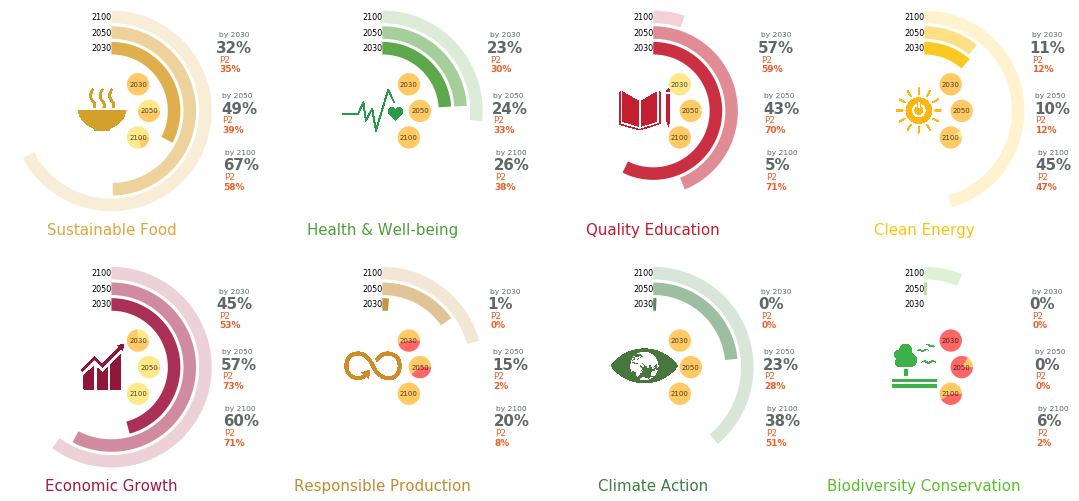

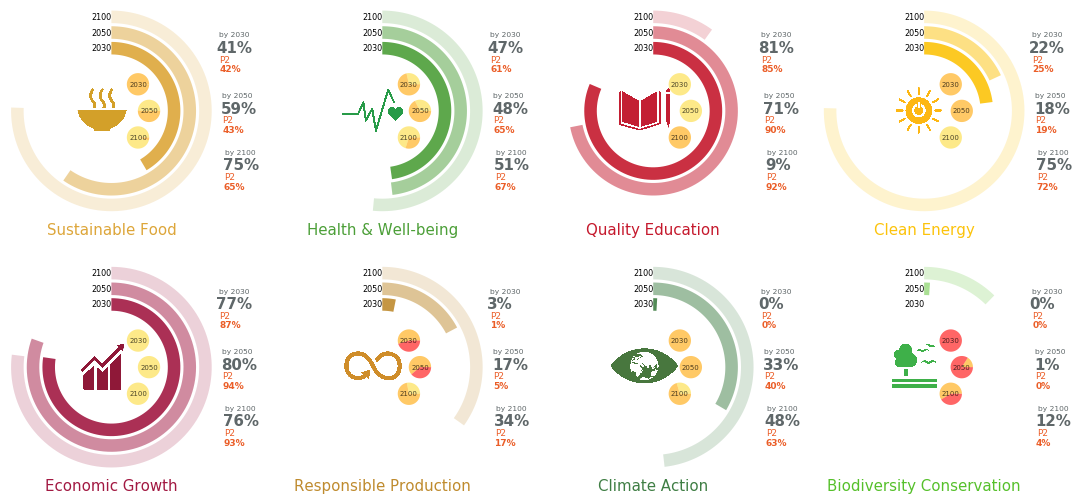

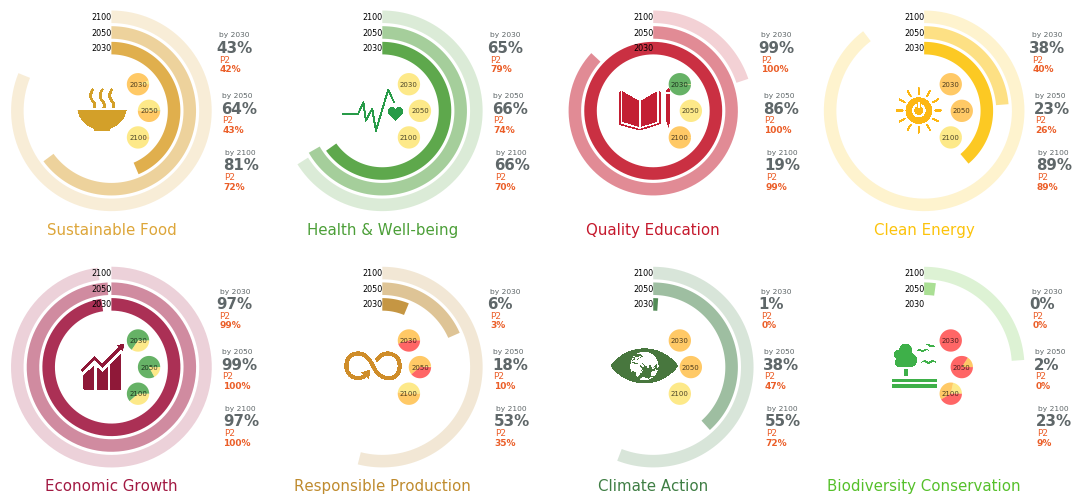

In [113]:
import itertools
import matplotlib as mpl
import matplotlib.image as mpimg
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox


# Set the target years, target levels to plot
target_year = {130:'2030', 150:'2050', 200:'2100'}
all_targets = [targets_2030, targets_2050, targets_2100]
target_level = {0: 'A', 1:'M', 2:'W'}
s_names = {'SSP1-26': 'P1', 'SSP2-45': 'P2', 
             'SSP3-70': 'P3', 'SSP4-60': 'P4', 'SSP5-85': 'P5'}

# Temporary indicator list to be used in plotting here. It's the same to the list of all indicators minus share of fossil energy
inds_remove = ['Share of Fossil Energy Supply']
inds_list = [x for x in indicator_list if x not in inds_remove]


# Separate the indicators (the entire list, not the major indicator) per each SDG
sdg_inds = {}
for i in ['2', '3', '4', '7', '8', '12', '13', '15']:
    sdg_inds[i] = df_ind1[df_ind1.ID.str.startswith(i)]['Target indicator'].to_list() 
# Remove the share of fossil energy supply manually for SDG-SSP paper.
sdg_inds['7'] = [x for x in sdg_inds['7'] if x not in 'Share of Fossil Energy Supply']

# Function for drawing pie chart scatter plot
def draw_pie(dist, 
             xpos, 
             ypos, 
             size,
             alpha,
             ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10,8))

    # for incremental pie slices
    cumsum = np.cumsum(dist)
    cumsum = cumsum/ cumsum[-1]
    pie = [0] + cumsum.tolist()

    i = 0
    for r1, r2 in zip(pie[:-1], pie[1:]):
        angles = np.linspace(2 * np.pi * r1, 2 * np.pi * r2)
        x = [0] + np.cos(angles).tolist()
        y = [0] + np.sin(angles).tolist()
        xy = np.column_stack([x, y])
        slice_color = {0:'green', 1:'#fddb3a', 2:'orange', 3:'red'} #
        ax.scatter([xpos], [ypos], marker=xy, color=slice_color[i], edgecolors='none', alpha=alpha, s=size) #
        i += 1

    return ax



"""
First, compute the progress at the indicator and goal levels.
"""

# Compute the progress per SSP, per target year, per target level, at the indicator level.
outcomes_norm_dict = {}
for y, year in enumerate(list(target_year.keys())):
    for s, ssp in enumerate(scenarios):
        for t in list(target_level.keys()):
            outcomes_norm = {}
            outcomes_norm[ssp] = pd.DataFrame(columns=inds_list)
            for i, ind in enumerate(inds_list):
                out_norm = outcomes[ssp][ind][:, year]
                #For indicators where reduction in indicator value is desired
                if all_targets[y][ind][5] == 'lower is better':
                    outcomes_norm[ssp][ind] = np.where(out_norm > all_targets[y][ind][3],
                                                            -(abs(out_norm - all_targets[y][ind][3])/abs(all_targets[y][ind][t]-all_targets[y][ind][3]))*100, 
                                                            (abs(out_norm - all_targets[y][ind][3])/abs(all_targets[y][ind][t]-all_targets[y][ind][3]))*100)
                #For indicators where increase in indicator value is desired
                if all_targets[y][ind][5] == 'higher is better':
                    outcomes_norm[ssp][ind] = np.where(out_norm < all_targets[y][ind][3],
                                                            -(abs(out_norm - all_targets[y][ind][3])/abs(all_targets[y][ind][t]-all_targets[y][ind][3]))*100, 
                                                            (abs(out_norm - all_targets[y][ind][3])/abs(all_targets[y][ind][t]-all_targets[y][ind][3]))*100)
            # Replace progress higher than 100% with 100 and lower than 0 by zero
            outcomes_norm[ssp][outcomes_norm[ssp] >= 100] = 100
            outcomes_norm[ssp][outcomes_norm[ssp] <= 0] = 0
            # Savel the results in a dictionary to use for plotting the pie charts
            outcomes_norm_dict[(ssp, target_year[year], target_level[t])] = outcomes_norm[ssp]       
            

        
# Identify in each SDG, how many futures meet the ambitious target at different levels (green, yellow, orange, red).
# this will be used for plotting the pie charts
df_count = {}
for group_name in ['green', 'yellow', 'orange', 'red']:
    for t in list(target_level.values()):
        for year in list(target_year.values()):
            df_count[(year, t, group_name)] = pd.DataFrame(index=scenarios, columns=list(sdg_names.keys()))

# Count the number of scenarios for differnet types of achivemengts, 
# but only for the target year 2100 (because SSP timeframe is till 2100) .
for t in list(target_level.keys()):
    for s, ssp in enumerate(scenarios):
        for y, year in enumerate(list(target_year.keys())):
            out = outcomes_norm_dict[(ssp, target_year[year], target_level[t])]
            for g, sdg in enumerate(list(sdg_names.keys())):
                out_sdg = out[sdg_inds[sdg]].sum(axis=1)/len(sdg_inds[sdg])
                df_count[(target_year[year], target_level[t], 'green')].loc[ssp][sdg] = out_sdg[out_sdg >= 100].count()
                df_count[(target_year[year], target_level[t], 'yellow')].loc[ssp][sdg] = out_sdg[(out_sdg < 100) & (out_sdg >= 50)].count()
                df_count[(target_year[year], target_level[t], 'orange')].loc[ssp][sdg] = out_sdg[(out_sdg < 50) & (out_sdg > 0)].count()
                df_count[(target_year[year], target_level[t], 'red')].loc[ssp][sdg] = out_sdg[out_sdg <= 0].count()      

        
"""
Second, develop circular bar plots with their markers
"""


g_list = ['Sustainable Food', 'Health & Well-being', 'Quality Education', 'Clean Energy', 'Economic Growth', 
          'Responsible Production', 'Climate Action', 'Biodiversity Conservation' ]

for t in list(target_level.keys()): #
    
    # Compute the Green Recovery and other pathways for cicular bar charts 
    y_bar = {} #to record the position of each pathway in barchart
    range_ssp = {} # to record the wors and best pathway for annotation
    for y, year in enumerate(list(target_year.keys())):   
        for g, sdg in enumerate(list(sdg_names.keys())):
            for s, ssp in enumerate(scenarios):
                norm_df = outcomes_norm_dict[(ssp, target_year[year], target_level[t])]

                # Compute an arthmatic average of of all indicators related to one SDG and use it as the mean
                sdg_norm = norm_df[sdg_inds[sdg]].sum(axis=1)/len(sdg_inds[sdg])
                y_bar[(ssp, target_year[year], sdg_names[sdg])] = np.mean(sdg_norm)*360/100 # convert it to degree for polar projection
                #err_ssp = np.mean(sdg_norm)
                
            # Compute the best-case and worst-case progress for annotation across SSPs. Note that annotation is only for moderate targets
            err_ssp = {}
            for s, ssp in enumerate(scenarios):
                # In each SSP
                norm_df_ssp = outcomes_norm_dict[(ssp, target_year[year], target_level[t])]
                # Compute an arthmatic average of of all indicators related to one SDG and use it as the mean
                sdg_norm_ssp = norm_df_ssp[sdg_inds[sdg]].sum(axis=1)/len(sdg_inds[sdg])
                err_ssp[ssp] = np.mean(sdg_norm_ssp)
            # The worst-case progress is the lowest progress among the SSPs.
            min_ssp = min(err_ssp.values())
            min_ssp_key = min(err_ssp, key=err_ssp.get)
            # The best case progress is the highest progress among the SSPs.
            max_ssp = max(err_ssp.values())
            max_ssp_key = max(err_ssp, key=err_ssp.get)
            # Only for target level moderate
            range_ssp[(target_level[t], target_year[year], sdg_names[sdg])] = (min_ssp, min_ssp_key, max_ssp, max_ssp_key)

            
            
    # Create the figure
    fig = plt.figure(figsize=(18.3, 9))
    axes = {}
    grid = plt.GridSpec(2, 4, hspace=.1, wspace=.3)
    for i, j in itertools.product(range(2), range(4)):
        axes[i,j] = fig.add_subplot(grid[i,j], projection='polar')
        
    i = 0
    j = 0
    for g, sdg in enumerate(list(sdg_names.keys())): #list(sdg_names.keys())

        if g == 4:
            i = 1 # To move to the second row of the figure
            j = 0 # To reset the column number of the subplots

        # Plot the progress levels by 2030, 2050, 2100 as cicular horizontal bar charts for Green Recovery
        axes[i,j].barh(2, np.radians(y_bar[('SSP4-60','2030', sdg_names[sdg])]), color=sdg_colors[sdg], alpha=.9, height=.4) #'#c7b198'
        axes[i,j].barh(2.5, np.radians(y_bar[('SSP4-60', '2050', sdg_names[sdg])]), color=sdg_colors[sdg], alpha=.5, height=.4) #'#dfd3c3'
        axes[i,j].barh(3, np.radians(y_bar[('SSP4-60', '2100', sdg_names[sdg])]), color=sdg_colors[sdg], alpha=.2, height=.4) #'#f0ece3'

        # Plot the eothre pathway markers by 2030, 2050, 2100 (currently not in use)
        #m_style = {0:"1", 1:"D", 2:"x", 3:"*"}
        #for s, ssp in enumerate(['SSP2-45', 'SSP3-70','SSP4-60','SSP5-85']):
            #for y, year in enumerate(list(target_year.keys())): 
                #theta_err = np.radians(y_bar[(ssp,target_year[year], sdg_names[sdg])])
                #r_err = 2+.5*y+0*theta_err
                #axes[i,j].plot(theta_err, r_err, marker=m_style[s], linestyle="", alpha=0.8, color="r")


        """
        Third, I develop scatter pie charts for the SSPs by 2100.
        """
        y_list = ['2030', '2050', '2100']
        for y, year in enumerate(list(target_year.keys())):
            green_slice = df_count[(target_year[year], target_level[t],'green')].loc['SSP4-60'][sdg].item()
            yellow_slice = df_count[(target_year[year], target_level[t],'yellow')].loc['SSP4-60'][sdg].item() 
            orange_slice = df_count[(target_year[year], target_level[t],'orange')].loc['SSP4-60'][sdg].item() 
            red_slice = df_count[(target_year[year], target_level[t],'red')].loc['SSP4-60'][sdg].item()
            draw_pie([green_slice,yellow_slice,orange_slice,red_slice],np.radians(45+y*45),1.2,500, 
                     alpha=.6, ax=axes[i,j])
            axes[i,j].text(np.radians(45+y*45),1.2, y_list[y], fontsize=7, color='black', alpha=.7, 
                           fontweight='normal', rotation=0,
                            horizontalalignment='center', verticalalignment='center')


        """
        Fourth, I annotate progress percentage in three target years for moderate target level and format the plot.
        """

        axes[i,j].set_theta_zero_location('N')
        axes[i,j].set_theta_direction(-1)
        axes[i,j].set_rlabel_position(0)
        #axes[i,j].set_thetagrids([0, 90, 180, 270], labels=[0, 25, 50, 75])
        axes[i,j].set_rgrids([2, 2.5, 3], labels=['2030', '2050', '2100'], fontsize=8, ha='right', va='center')
        axes[i,j].spines['polar'].set_visible(False)
        axes[i,j].grid(False)
        axes[i,j].set_thetagrids([], visible=False)
        #axes[i,j].set_rgrids([], visible=False)

        
        # 2030
        # y_bar annotate only moderate target level. range_ssp annotate worst case and best scenaario based on ambitious and weak target. 100/360 multiplier is to convert from polar degree to actual percentage

        # Calculate the progress

        progress_mean={} # Green recovery progress
        progress_bau={} # BAU progress
        progress_min={} # Worst pathway progress
        for ty in ['2030', '2050', '2100']:
            if int(y_bar[('SSP4-60',ty, sdg_names[sdg])]*100/360) < 0:
                   progress_mean[ty] = '0'
            else: 
                   progress_mean[ty] = str(int(y_bar[('SSP4-60',ty, sdg_names[sdg])]*100/360))

            if int(y_bar[('SSP2-45',ty, sdg_names[sdg])]*100/360) < 0:
                   progress_bau[ty] = '0'
            else: 
                   progress_bau[ty] = str(int(y_bar[('SSP2-45',ty, sdg_names[sdg])]*100/360))

            if int(range_ssp[(target_level[t],ty, sdg_names[sdg])][0]) < 0:
                   progress_min[ty] = '0'
            else: 
                   progress_min[ty] = str(int(range_ssp[(target_level[t],ty, sdg_names[sdg])][0]))


        # 2030       
        axes[i,j].text(.98, 4.15, 'by 2030\n', fontsize=7.5, color='#5f6769', fontweight='normal', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        axes[i,j].text(1.03, 3.9, progress_mean['2030']+'%', fontsize=15, color='#5f6769',fontweight='heavy', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        axes[i,j].text(1.125, 3.8, 'P2', fontsize=9, color='#eb5e28',fontweight='normal', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        axes[i,j].text(1.2, 3.7, progress_bau['2030']+'%', fontsize=9, color='#eb5e28',fontweight='heavy', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        #axes[i,j].text(1.21, 4.6, s_names[range_ssp[(target_level[t],'2030', sdg_names[sdg])][1]], fontsize=9, color='#68d0f3',fontweight='normal', rotation=0,
                            #horizontalalignment='left', verticalalignment='center')
        #axes[i,j].text(1.265, 4.45, progress_min['2030']+'%', fontsize=9, color='#1fb4ee',fontweight='heavy', rotation=0,
                            #horizontalalignment='left', verticalalignment='center')


        # 2050
        axes[i,j].text(1.46, 3.55, 'by 2050\n', fontsize=7.5, color='#5f6769', fontweight='normal', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        # y_bar annotate only moderate target level
        axes[i,j].text(1.55, 3.5, progress_mean['2050']+'%', fontsize=15, color='#5f6769', fontweight='heavy', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        axes[i,j].text(1.65, 3.55, 'P2', fontsize=9, color='#eb5e28',fontweight='normal', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        axes[i,j].text(1.738, 3.6, progress_bau['2050']+'%', fontsize=9, color='#eb5e28',fontweight='heavy', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        #axes[i,j].text(1.64, 4.25, s_names[range_ssp[(target_level[t],'2050', sdg_names[sdg])][1]], fontsize=9, color='#68d0f3',fontweight='normal', rotation=0,
                            #horizontalalignment='left', verticalalignment='center')
        #axes[i,j].text(1.709, 4.3, progress_min['2050']+'%', fontsize=9, color='#1fb4ee',fontweight='heavy', rotation=0,
                            #horizontalalignment='left', verticalalignment='center')

        # 2100
        axes[i,j].text(1.95, 3.9, 'by 2100\n', fontsize=7.5, color='#5f6769', fontweight='normal', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        # y_bar annotate only moderate target level
        axes[i,j].text(2.02, 3.95, progress_mean['2100']+'%', fontsize=15, color='#5f6769', fontweight='heavy', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        axes[i,j].text(2.1, 4.17, 'P2', fontsize=9, color='#eb5e28',fontweight='normal', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        axes[i,j].text(2.166, 4.31, progress_bau['2100']+'%', fontsize=9, color='#eb5e28',fontweight='heavy', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        #axes[i,j].text(2.02, 4.8, s_names[range_ssp[(target_level[t],'2100', sdg_names[sdg])][1]], fontsize=9, color='#68d0f3',fontweight='normal', rotation=0,
                            #horizontalalignment='left', verticalalignment='center')
        #axes[i,j].text(2.084, 4.95, progress_min['2100']+'%', fontsize=9, color='#1fb4ee',fontweight='heavy', rotation=0,
                            #horizontalalignment='left', verticalalignment='center')


        axes[i,j].text(np.radians(180), 3.8, g_list[g], fontsize=15, color=sdg_colors[sdg], fontweight='normal', 
                       rotation=0, horizontalalignment='center', verticalalignment='center')

        # Print the SDG icon
        img_dir = 'N:/Planet-A/Current-Users/Enayat-Moallemi/Moallemi_et_al_SDG_SSP_Assessment/Fig/SDG_icons/'
        img = mpimg.imread(img_dir+str(sdg)+'.png')
        imagebox = OffsetImage(img, zoom=0.03)
        if sdg == '7':
            ab = AnnotationBbox(imagebox, (275, .2), xycoords='data', frameon=False) # the XY in annotation is based on theta (0-360) and r
        else:
            ab = AnnotationBbox(imagebox, (275, .3), xycoords='data', frameon=False) # the XY in annotation is based on theta (0-360) and r
        axes[i,j].add_artist(ab)
        j += 1

    #plt.savefig('{}/SSPs_SDGs_sum_maintext_300dpi.png'.format(r'C:/Users/moallemie/GitHub/SSPs_SDGs_Assessment/Fig/'), dpi=300,  bbox_inches='tight') 
    plt.savefig('{}/SSPs_SDGs_IQ_{}.png'.format(r'N:/Planet-A/Current-Users/Enayat-Moallemi/Moallemi_et_al_SDG_SSP_Assessment/Fig/', target_level[t]), dpi=600,  bbox_inches='tight') 
    #plt.savefig('{}/SSPs_SDGs_sum_maintext.pdf'.format(r'C:/Users/moallemie/GitHub/SSPs_SDGs_Assessment/Fig/'), dpi=600,  bbox_inches='tight') 
    #plt.savefig('{}/SSPs_SDGs_sum_maintext.svg'.format(r'C:/Users/moallemie/GitHub/SSPs_SDGs_Assessment/Fig/'), dpi=600,  bbox_inches='tight') 



## Progress per SDG (main text) - Fossil Fuelled Development

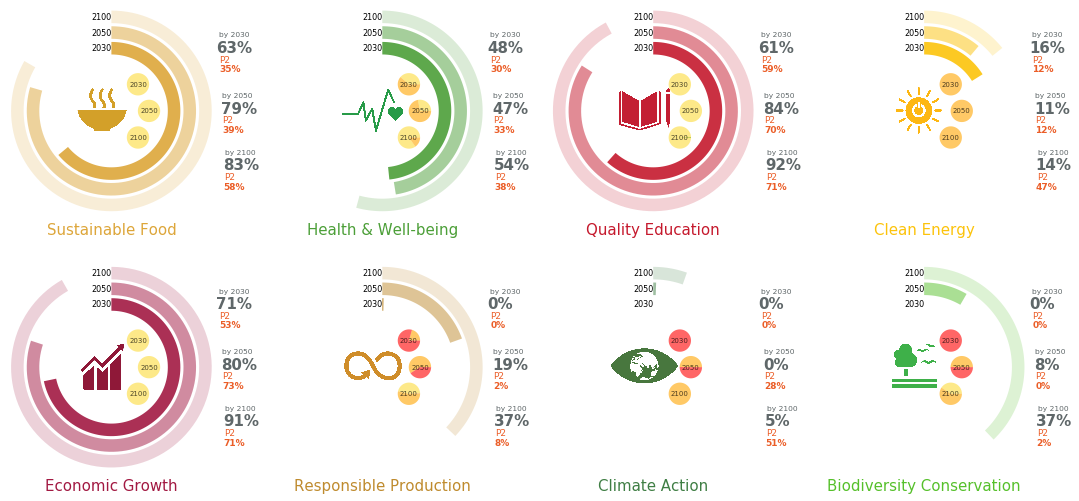

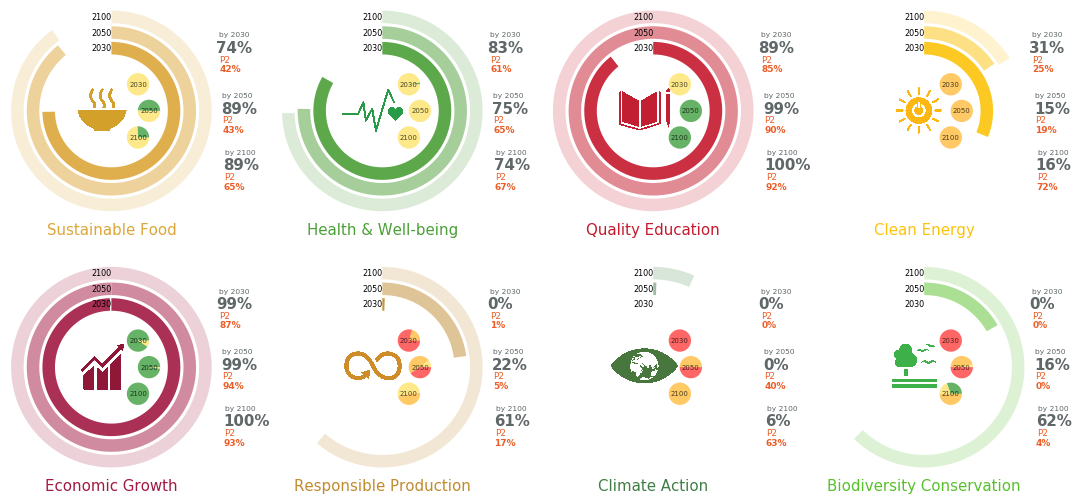

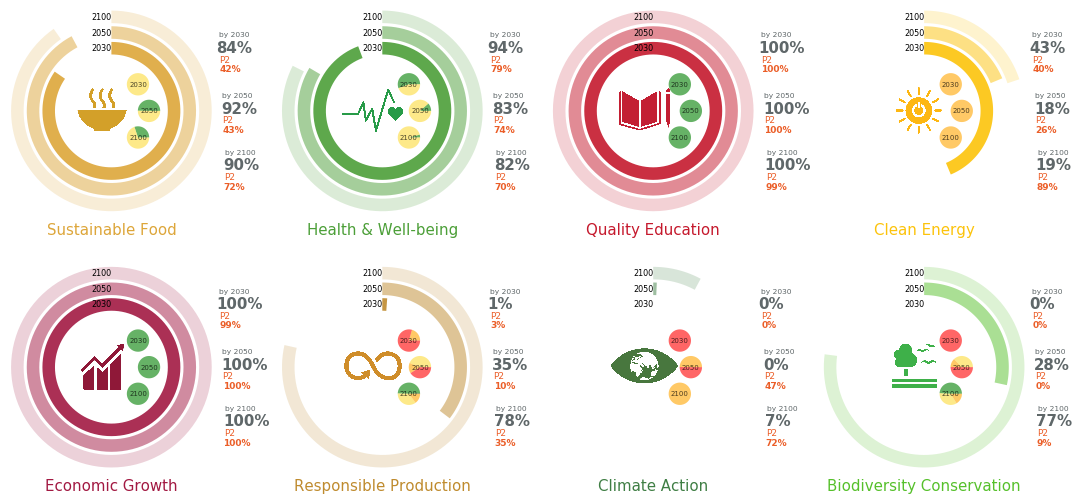

In [115]:
import itertools
import matplotlib as mpl
import matplotlib.image as mpimg
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox


# Set the target years, target levels to plot
target_year = {130:'2030', 150:'2050', 200:'2100'}
all_targets = [targets_2030, targets_2050, targets_2100]
target_level = {0: 'A', 1:'M', 2:'W'}
s_names = {'SSP1-26': 'P1', 'SSP2-45': 'P2', 
             'SSP3-70': 'P3', 'SSP4-60': 'P4', 'SSP5-85': 'P5'}

# Temporary indicator list to be used in plotting here. It's the same to the list of all indicators minus share of fossil energy
inds_remove = ['Share of Fossil Energy Supply']
inds_list = [x for x in indicator_list if x not in inds_remove]


# Separate the indicators (the entire list, not the major indicator) per each SDG
sdg_inds = {}
for i in ['2', '3', '4', '7', '8', '12', '13', '15']:
    sdg_inds[i] = df_ind1[df_ind1.ID.str.startswith(i)]['Target indicator'].to_list() 
# Remove the share of fossil energy supply manually for SDG-SSP paper.
sdg_inds['7'] = [x for x in sdg_inds['7'] if x not in 'Share of Fossil Energy Supply']

# Function for drawing pie chart scatter plot
def draw_pie(dist, 
             xpos, 
             ypos, 
             size,
             alpha,
             ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10,8))

    # for incremental pie slices
    cumsum = np.cumsum(dist)
    cumsum = cumsum/ cumsum[-1]
    pie = [0] + cumsum.tolist()

    i = 0
    for r1, r2 in zip(pie[:-1], pie[1:]):
        angles = np.linspace(2 * np.pi * r1, 2 * np.pi * r2)
        x = [0] + np.cos(angles).tolist()
        y = [0] + np.sin(angles).tolist()
        xy = np.column_stack([x, y])
        slice_color = {0:'green', 1:'#fddb3a', 2:'orange', 3:'red'} #
        ax.scatter([xpos], [ypos], marker=xy, color=slice_color[i], edgecolors='none', alpha=alpha, s=size) #
        i += 1

    return ax



"""
First, compute the progress at the indicator and goal levels.
"""

# Compute the progress per SSP, per target year, per target level, at the indicator level.
outcomes_norm_dict = {}
for y, year in enumerate(list(target_year.keys())):
    for s, ssp in enumerate(scenarios):
        for t in list(target_level.keys()):
            outcomes_norm = {}
            outcomes_norm[ssp] = pd.DataFrame(columns=inds_list)
            for i, ind in enumerate(inds_list):
                out_norm = outcomes[ssp][ind][:, year]
                #For indicators where reduction in indicator value is desired
                if all_targets[y][ind][5] == 'lower is better':
                    outcomes_norm[ssp][ind] = np.where(out_norm > all_targets[y][ind][3],
                                                            -(abs(out_norm - all_targets[y][ind][3])/abs(all_targets[y][ind][t]-all_targets[y][ind][3]))*100, 
                                                            (abs(out_norm - all_targets[y][ind][3])/abs(all_targets[y][ind][t]-all_targets[y][ind][3]))*100)
                #For indicators where increase in indicator value is desired
                if all_targets[y][ind][5] == 'higher is better':
                    outcomes_norm[ssp][ind] = np.where(out_norm < all_targets[y][ind][3],
                                                            -(abs(out_norm - all_targets[y][ind][3])/abs(all_targets[y][ind][t]-all_targets[y][ind][3]))*100, 
                                                            (abs(out_norm - all_targets[y][ind][3])/abs(all_targets[y][ind][t]-all_targets[y][ind][3]))*100)
            # Replace progress higher than 100% with 100 and lower than 0 by zero
            outcomes_norm[ssp][outcomes_norm[ssp] >= 100] = 100
            outcomes_norm[ssp][outcomes_norm[ssp] <= 0] = 0
            # Savel the results in a dictionary to use for plotting the pie charts
            outcomes_norm_dict[(ssp, target_year[year], target_level[t])] = outcomes_norm[ssp]       
            

        
# Identify in each SDG, how many futures meet the ambitious target at different levels (green, yellow, orange, red).
# this will be used for plotting the pie charts
df_count = {}
for group_name in ['green', 'yellow', 'orange', 'red']:
    for t in list(target_level.values()):
        for year in list(target_year.values()):
            df_count[(year, t, group_name)] = pd.DataFrame(index=scenarios, columns=list(sdg_names.keys()))

# Count the number of scenarios for differnet types of achivemengts, 
# but only for the target year 2100 (because SSP timeframe is till 2100) .
for t in list(target_level.keys()):
    for s, ssp in enumerate(scenarios):
        for y, year in enumerate(list(target_year.keys())):
            out = outcomes_norm_dict[(ssp, target_year[year], target_level[t])]
            for g, sdg in enumerate(list(sdg_names.keys())):
                out_sdg = out[sdg_inds[sdg]].sum(axis=1)/len(sdg_inds[sdg])
                df_count[(target_year[year], target_level[t], 'green')].loc[ssp][sdg] = out_sdg[out_sdg >= 100].count()
                df_count[(target_year[year], target_level[t], 'yellow')].loc[ssp][sdg] = out_sdg[(out_sdg < 100) & (out_sdg >= 50)].count()
                df_count[(target_year[year], target_level[t], 'orange')].loc[ssp][sdg] = out_sdg[(out_sdg < 50) & (out_sdg > 0)].count()
                df_count[(target_year[year], target_level[t], 'red')].loc[ssp][sdg] = out_sdg[out_sdg <= 0].count()  

        
"""
Second, develop circular bar plots with their markers
"""


g_list = ['Sustainable Food', 'Health & Well-being', 'Quality Education', 'Clean Energy', 'Economic Growth', 
          'Responsible Production', 'Climate Action', 'Biodiversity Conservation' ]

for t in list(target_level.keys()): #
    
    # Compute the Green Recovery and other pathways for cicular bar charts 
    y_bar = {} #to record the position of each pathway in barchart
    range_ssp = {} # to record the wors and best pathway for annotation
    for y, year in enumerate(list(target_year.keys())):   
        for g, sdg in enumerate(list(sdg_names.keys())):
            for s, ssp in enumerate(scenarios):
                norm_df = outcomes_norm_dict[(ssp, target_year[year], target_level[t])]

                # Compute an arthmatic average of of all indicators related to one SDG and use it as the mean
                sdg_norm = norm_df[sdg_inds[sdg]].sum(axis=1)/len(sdg_inds[sdg])
                y_bar[(ssp, target_year[year], sdg_names[sdg])] = np.mean(sdg_norm)*360/100 # convert it to degree for polar projection
                #err_ssp = np.mean(sdg_norm)
                
            # Compute the best-case and worst-case progress for annotation across SSPs. Note that annotation is only for moderate targets
            err_ssp = {}
            for s, ssp in enumerate(scenarios):
                # In each SSP
                norm_df_ssp = outcomes_norm_dict[(ssp, target_year[year], target_level[t])]
                # Compute an arthmatic average of of all indicators related to one SDG and use it as the mean
                sdg_norm_ssp = norm_df_ssp[sdg_inds[sdg]].sum(axis=1)/len(sdg_inds[sdg])
                err_ssp[ssp] = np.mean(sdg_norm_ssp)
            # The worst-case progress is the lowest progress among the SSPs.
            min_ssp = min(err_ssp.values())
            min_ssp_key = min(err_ssp, key=err_ssp.get)
            # The best case progress is the highest progress among the SSPs.
            max_ssp = max(err_ssp.values())
            max_ssp_key = max(err_ssp, key=err_ssp.get)
            # Only for target level moderate
            range_ssp[(target_level[t], target_year[year], sdg_names[sdg])] = (min_ssp, min_ssp_key, max_ssp, max_ssp_key)

            
            
    # Create the figure
    fig = plt.figure(figsize=(18.3, 9))
    axes = {}
    grid = plt.GridSpec(2, 4, hspace=.1, wspace=.3)
    for i, j in itertools.product(range(2), range(4)):
        axes[i,j] = fig.add_subplot(grid[i,j], projection='polar')
        
    i = 0
    j = 0
    for g, sdg in enumerate(list(sdg_names.keys())): #list(sdg_names.keys())

        if g == 4:
            i = 1 # To move to the second row of the figure
            j = 0 # To reset the column number of the subplots

        # Plot the progress levels by 2030, 2050, 2100 as cicular horizontal bar charts for Green Recovery
        axes[i,j].barh(2, np.radians(y_bar[('SSP5-85','2030', sdg_names[sdg])]), color=sdg_colors[sdg], alpha=.9, height=.4) #'#c7b198'
        axes[i,j].barh(2.5, np.radians(y_bar[('SSP5-85', '2050', sdg_names[sdg])]), color=sdg_colors[sdg], alpha=.5, height=.4) #'#dfd3c3'
        axes[i,j].barh(3, np.radians(y_bar[('SSP5-85', '2100', sdg_names[sdg])]), color=sdg_colors[sdg], alpha=.2, height=.4) #'#f0ece3'

        # Plot the eothre pathway markers by 2030, 2050, 2100 (currently not in use)
        #m_style = {0:"1", 1:"D", 2:"x", 3:"*"}
        #for s, ssp in enumerate(['SSP2-45', 'SSP3-70','SSP4-60','SSP5-85']):
            #for y, year in enumerate(list(target_year.keys())): 
                #theta_err = np.radians(y_bar[(ssp,target_year[year], sdg_names[sdg])])
                #r_err = 2+.5*y+0*theta_err
                #axes[i,j].plot(theta_err, r_err, marker=m_style[s], linestyle="", alpha=0.8, color="r")


        """
        Third, I develop scatter pie charts for the SSPs by 2100.
        """
        y_list = ['2030', '2050', '2100']
        for y, year in enumerate(list(target_year.keys())):
            green_slice = df_count[(target_year[year], target_level[t],'green')].loc['SSP5-85'][sdg].item()
            yellow_slice = df_count[(target_year[year], target_level[t],'yellow')].loc['SSP5-85'][sdg].item() 
            orange_slice = df_count[(target_year[year], target_level[t],'orange')].loc['SSP5-85'][sdg].item() 
            red_slice = df_count[(target_year[year], target_level[t],'red')].loc['SSP5-85'][sdg].item()
            draw_pie([green_slice,yellow_slice,orange_slice,red_slice],np.radians(45+y*45),1.2,500, 
                     alpha=.6, ax=axes[i,j])
            axes[i,j].text(np.radians(45+y*45),1.2, y_list[y], fontsize=7, color='black', alpha=.7, 
                           fontweight='normal', rotation=0,
                            horizontalalignment='center', verticalalignment='center')


        """
        Fourth, I annotate progress percentage in three target years for moderate target level and format the plot.
        """

        axes[i,j].set_theta_zero_location('N')
        axes[i,j].set_theta_direction(-1)
        axes[i,j].set_rlabel_position(0)
        #axes[i,j].set_thetagrids([0, 90, 180, 270], labels=[0, 25, 50, 75])
        axes[i,j].set_rgrids([2, 2.5, 3], labels=['2030', '2050', '2100'], fontsize=8, ha='right', va='center')
        axes[i,j].spines['polar'].set_visible(False)
        axes[i,j].grid(False)
        axes[i,j].set_thetagrids([], visible=False)
        #axes[i,j].set_rgrids([], visible=False)

        
        # 2030
        # y_bar annotate only moderate target level. range_ssp annotate worst case and best scenaario based on ambitious and weak target. 100/360 multiplier is to convert from polar degree to actual percentage

        # Calculate the progress

        progress_mean={} # Green recovery progress
        progress_bau={} # BAU progress
        progress_min={} # Worst pathway progress
        for ty in ['2030', '2050', '2100']:
            if int(y_bar[('SSP5-85',ty, sdg_names[sdg])]*100/360) < 0:
                   progress_mean[ty] = '0'
            else: 
                   progress_mean[ty] = str(int(y_bar[('SSP5-85',ty, sdg_names[sdg])]*100/360))

            if int(y_bar[('SSP2-45',ty, sdg_names[sdg])]*100/360) < 0:
                   progress_bau[ty] = '0'
            else: 
                   progress_bau[ty] = str(int(y_bar[('SSP2-45',ty, sdg_names[sdg])]*100/360))

            if int(range_ssp[(target_level[t],ty, sdg_names[sdg])][0]) < 0:
                   progress_min[ty] = '0'
            else: 
                   progress_min[ty] = str(int(range_ssp[(target_level[t],ty, sdg_names[sdg])][0]))


        # 2030       
        axes[i,j].text(.98, 4.15, 'by 2030\n', fontsize=7.5, color='#5f6769', fontweight='normal', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        axes[i,j].text(1.03, 3.9, progress_mean['2030']+'%', fontsize=15, color='#5f6769',fontweight='heavy', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        axes[i,j].text(1.125, 3.8, 'P2', fontsize=9, color='#eb5e28',fontweight='normal', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        axes[i,j].text(1.2, 3.7, progress_bau['2030']+'%', fontsize=9, color='#eb5e28',fontweight='heavy', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        #axes[i,j].text(1.21, 4.6, s_names[range_ssp[(target_level[t],'2030', sdg_names[sdg])][1]], fontsize=9, color='#68d0f3',fontweight='normal', rotation=0,
                            #horizontalalignment='left', verticalalignment='center')
        #axes[i,j].text(1.265, 4.45, progress_min['2030']+'%', fontsize=9, color='#1fb4ee',fontweight='heavy', rotation=0,
                            #horizontalalignment='left', verticalalignment='center')


        # 2050
        axes[i,j].text(1.46, 3.55, 'by 2050\n', fontsize=7.5, color='#5f6769', fontweight='normal', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        # y_bar annotate only moderate target level
        axes[i,j].text(1.55, 3.5, progress_mean['2050']+'%', fontsize=15, color='#5f6769', fontweight='heavy', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        axes[i,j].text(1.65, 3.55, 'P2', fontsize=9, color='#eb5e28',fontweight='normal', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        axes[i,j].text(1.738, 3.6, progress_bau['2050']+'%', fontsize=9, color='#eb5e28',fontweight='heavy', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        #axes[i,j].text(1.64, 4.25, s_names[range_ssp[(target_level[t],'2050', sdg_names[sdg])][1]], fontsize=9, color='#68d0f3',fontweight='normal', rotation=0,
                            #horizontalalignment='left', verticalalignment='center')
        #axes[i,j].text(1.709, 4.3, progress_min['2050']+'%', fontsize=9, color='#1fb4ee',fontweight='heavy', rotation=0,
                            #horizontalalignment='left', verticalalignment='center')

        # 2100
        axes[i,j].text(1.95, 3.9, 'by 2100\n', fontsize=7.5, color='#5f6769', fontweight='normal', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        # y_bar annotate only moderate target level
        axes[i,j].text(2.02, 3.95, progress_mean['2100']+'%', fontsize=15, color='#5f6769', fontweight='heavy', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        axes[i,j].text(2.1, 4.17, 'P2', fontsize=9, color='#eb5e28',fontweight='normal', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        axes[i,j].text(2.166, 4.31, progress_bau['2100']+'%', fontsize=9, color='#eb5e28',fontweight='heavy', rotation=0,
                            horizontalalignment='left', verticalalignment='center')
        #axes[i,j].text(2.02, 4.8, s_names[range_ssp[(target_level[t],'2100', sdg_names[sdg])][1]], fontsize=9, color='#68d0f3',fontweight='normal', rotation=0,
                            #horizontalalignment='left', verticalalignment='center')
        #axes[i,j].text(2.084, 4.95, progress_min['2100']+'%', fontsize=9, color='#1fb4ee',fontweight='heavy', rotation=0,
                            #horizontalalignment='left', verticalalignment='center')


        axes[i,j].text(np.radians(180), 3.8, g_list[g], fontsize=15, color=sdg_colors[sdg], fontweight='normal', 
                       rotation=0, horizontalalignment='center', verticalalignment='center')

        # Print the SDG icon
        img_dir = 'N:/Planet-A/Current-Users/Enayat-Moallemi/Moallemi_et_al_SDG_SSP_Assessment/Fig/SDG_icons/'
        img = mpimg.imread(img_dir+str(sdg)+'.png')
        imagebox = OffsetImage(img, zoom=0.03)
        if sdg == '7':
            ab = AnnotationBbox(imagebox, (275, .2), xycoords='data', frameon=False) # the XY in annotation is based on theta (0-360) and r
        else:
            ab = AnnotationBbox(imagebox, (275, .3), xycoords='data', frameon=False) # the XY in annotation is based on theta (0-360) and r
        axes[i,j].add_artist(ab)
        j += 1

    #plt.savefig('{}/SSPs_SDGs_sum_maintext_300dpi.png'.format(r'C:/Users/moallemie/GitHub/SSPs_SDGs_Assessment/Fig/'), dpi=300,  bbox_inches='tight') 
    plt.savefig('{}/SSPs_SDGs_FD_{}.png'.format(r'N:/Planet-A/Current-Users/Enayat-Moallemi/Moallemi_et_al_SDG_SSP_Assessment/Fig/', target_level[t]), dpi=600,  bbox_inches='tight') 
    #plt.savefig('{}/SSPs_SDGs_sum_maintext.pdf'.format(r'C:/Users/moallemie/GitHub/SSPs_SDGs_Assessment/Fig/'), dpi=600,  bbox_inches='tight') 
    #plt.savefig('{}/SSPs_SDGs_sum_maintext.svg'.format(r'C:/Users/moallemie/GitHub/SSPs_SDGs_Assessment/Fig/'), dpi=600,  bbox_inches='tight') 

